# lowess fit characteristics of curves and ... 

Partly updated to FEB2024!!!

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
# for plots withinplots 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import pearsonr, spearmanr

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
glob_temp = np.arange(-0.2,6.8,0.1)

add = ''
# add= '_temp_above_0_8'
# this is actually not neces
approach = '_via_5yravg'
DATE = 'Feb12_2024'

no_rel_farinotti = True ### did not do the lowess stuf rel_farinotti!!!

In [2]:
df = pd.read_csv(f'3_shift_summary_region_characteristics{DATE}.csv', index_col=[0])


In [3]:
p_shift='_shift_years_rel_2020'

# todo: move that to the lowess fit stuff directly????
avg_over = '101yr'
#add = '_fit_to_median_lowess_added'
add = '_lowess_added_quantiles_added'
#GlacierMIP3/2023_exploratory_analysis_notebooks/fitted_lowess_best_frac_shift_years_rel_2020_100yr_avg_period_lowess_added_quantiles_added_current12deg_5000.csv
#fitted_lowess_best_frac_100yr_avg_period_fit_to_median_lowess_added_current12deg.csv
pd_sel = pd.read_csv(f'lowess_fits/fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_5000_{DATE}.csv', index_col=[0])
pd_sel['rgi_reg'] = pd_sel.region.values
pd_sel= pd_sel.loc[np.isnan(pd_sel.y)]
#pd_sel = pd_sel.loc[pd_sel.year == 5000]
pd_sel.loc[pd_sel.region == 'All', 'region'] = 'Globally'
pd_sel.index = np.round(pd_sel.index.values,6)
pd_sel_rel_2020 = pd_sel.copy()
for r in df.index:
    scaling_factor_rel_itmix_to_rel_2020 = df.loc[r,'regional_volume_m3_itmix_vs_2020']
    pd_sel.loc[pd_sel.rgi_reg ==r, 'regional_volume_m3_itmix_vs_2020'] = scaling_factor_rel_itmix_to_rel_2020

if p_shift=='_shift_years_rel_2020':
    pd_sel['ice_loss_rel_2020'] = 100-pd_sel['0.5']
    #_add = '_lowess_added'
    _add = '_fit_to_median_lowess_added'
    # ok whatever, the iceloss relative farinotti is not perfectly the same fit , as currently for that, we only have the fit to the median
    # TODO --> ADD Here
    ### rel. farinotti is deprecated -
    if no_rel_farinotti: 
        pd_sel.loc[:, 'ice_loss_rel_farinotti'] = np.NaN
    else:
        pd_self = pd.read_csv(f'fitted_lowess_best_frac_{avg_over}_avg_period{_add}_current12deg.csv', index_col=[0])
        pd_self= pd_self.loc[np.isnan(pd_self.y)]

        pd_self.index = np.round(pd_self.index.values,6)
        pd_self = pd_self.loc[pd_self.year == 5000]
        assert len(pd_self) == len(pd_sel)

        pd_self.loc[pd_self.region == 'All', 'region'] = 'Globally'
        pd_sel.loc[:, 'ice_loss_rel_farinotti'] = 100-pd_self['0.5'].values #pd_self.index.unique() 
else:
    pd_sel['ice_loss_rel_farinotti'] = 100-pd_sel['0.5']
    pd_sel['ice_loss_rel_2020'] = 100-pd_sel['0.5']*pd_sel['regional_volume_m3_itmix_vs_2020']
pd_sel['x']= pd_sel.index
pd_sel.to_csv(f'fitted_lowess_best_frac{p_shift}_{avg_over}_avg_period{add}_current12deg_w_ice_loss_steady_state_{DATE}.csv')

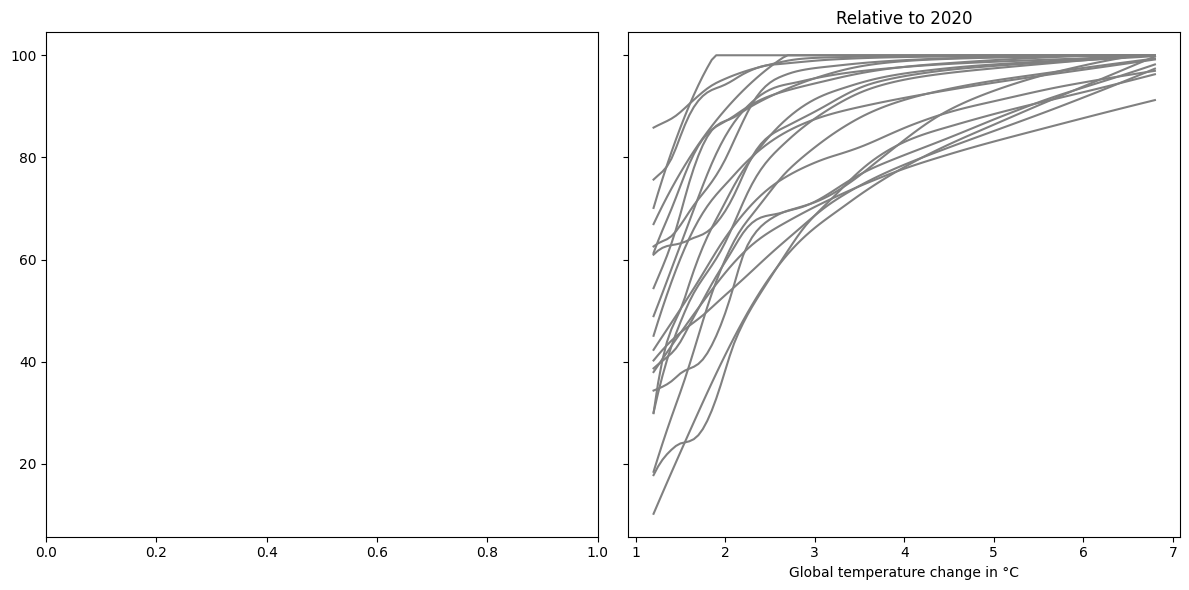

In [4]:
fig, axs = plt.subplots(1,2, figsize=(12,6), sharey=True)
if not no_rel_farinotti: 
    for reg in pd_sel.region.unique():
        sns.lineplot(data=pd_sel.loc[(pd_sel.region==reg)&(pd_sel.x>=1.2)], ax = axs[0], 
                     x='x', y='ice_loss_rel_farinotti', color='grey')
    axs[0].set_ylabel('ice loss %')
    axs[0].set_xlabel('Global temperature change in °C')
    axs[0].set_title('Relative to Farinotti')
for reg in pd_sel.region.unique():
    sns.lineplot(data=pd_sel.loc[(pd_sel.region==reg)&(pd_sel.x>=1.2)],ax = axs[1], 
                 x='x', y='ice_loss_rel_2020', color='grey')
axs[1].set_ylabel('ice loss %')
axs[1].set_title('Relative to 2020')
axs[1].set_xlabel('Global temperature change in °C')

plt.tight_layout()

In [5]:
df.columns

Index(['rgi_reg', 'region', 'temp_ch_avg_2000-2019_vs_1901-1920',
       'temp_ch_avg_1986-2005_vs_1901-1920',
       'temp_ch_avg_1995-2014_vs_1901-1920', 'temp_avg_2000-2019',
       'prcp_avg_2000-2019', 'continentality_index_avg_2000-2019',
       'temp_avg_1981-2000', 'prcp_avg_1981-2000',
       'continentality_index_avg_1981-2000', 'temp_avg_1995-2014',
       'prcp_avg_1995-2014', 'continentality_index_avg_1995-2014',
       'median_reg_vs_glob_ch',
       'median_reg_vs_glob_temp_ch_above_zero_eight_deg',
       'median_reg_vs_glob_temp_ch_0.8_1.5',
       'median_reg_vs_glob_temp_ch_1.5_3.0', 'slope_fit_reg_vs_glob_ch',
       'slope_weighted_vol_avg', 'slope_weighted_area_avg',
       'lat_absolute_weighted_area_avg', 'lat_weighted_area_avg',
       'marine_term_ratio_hundredlargest_glac', 'geodetic_obs_area_weighted',
       'mean_vol_ten_largest_glac', 'elev_diff_area_weighted',
       'elev_diff_to_med_area_weighted', 'ice_cap_ratio_hundredlargest_glac',
       'max_elev_

In [6]:
pd_lowess_ch = pd.DataFrame(index=df.region)
if no_rel_farinotti:
    opts = ['_rel_2020']
else:
    opts = ['_rel_farinotti', '_rel_2020']
for rel_add in opts: 
    for reg in pd_lowess_ch.index:
        pd_reg = pd_sel.loc[pd_sel.region==reg]
        pd_reg_1_2 = pd_reg.loc[np.abs(pd_reg.x-1.2).idxmin()]
        ice_loss_reg_1_2 = pd_reg_1_2[f'ice_loss{rel_add}']
        pd_lowess_ch.loc[reg,f'ice_loss_1.2°C_%{rel_add}'] =  ice_loss_reg_1_2
        
        pd_reg_2_7 = pd_reg.loc[np.abs(pd_reg.x-2.7).idxmin()]
        ice_loss_reg_2_7 = pd_reg_2_7[f'ice_loss{rel_add}']
        pd_lowess_ch.loc[reg,f'ice_loss_2.7°C_%{rel_add}'] =  ice_loss_reg_2_7
        
        pd_reg_1_5 = pd_reg.loc[np.abs(pd_reg.x-1.5).idxmin()]
        ice_loss_reg_1_5 = pd_reg_1_5[f'ice_loss{rel_add}']
        pd_lowess_ch.loc[reg,f'ice_loss_1.5°C_%{rel_add}'] =  ice_loss_reg_1_5
        
        pd_reg_2 = pd_reg.loc[np.abs(pd_reg.x-2).idxmin()]
        ice_loss_reg_2 = pd_reg_2[f'ice_loss{rel_add}']
        pd_lowess_ch.loc[reg,f'ice_loss_2.0°C_%{rel_add}'] =  ice_loss_reg_2
        
        pd_reg_3 = pd_reg.loc[np.abs(pd_reg.x-3).idxmin()]
        ice_loss_reg_3 = pd_reg_3[f'ice_loss{rel_add}']
        pd_lowess_ch.loc[reg,f'ice_loss_3.0°C_%{rel_add}'] =  ice_loss_reg_3
        
        deg_celsius_ch = 1.5
        for temp0 in np.arange(1,2.1,0.1):
            temp1 = temp0+deg_celsius_ch
            ice_loss_diff = pd_reg.loc[np.abs(pd_reg.x-temp1).idxmin()][f'ice_loss{rel_add}']-pd_reg.loc[np.abs(pd_reg.x-temp0).idxmin()][f'ice_loss{rel_add}']
            pd_lowess_ch.loc[reg, f'ice_loss_slope_between_{temp0.round(1)}_and_{temp1.round(1)}_per_degC{rel_add}'] = (ice_loss_diff)/deg_celsius_ch

        deg_celsius_ch = 2
        for temp0 in np.arange(1,2.1,0.1):
            temp1 = temp0+deg_celsius_ch
            ice_loss_diff = pd_reg.loc[np.abs(pd_reg.x-temp1).idxmin()][f'ice_loss{rel_add}']-pd_reg.loc[np.abs(pd_reg.x-temp0).idxmin()][f'ice_loss{rel_add}']
            pd_lowess_ch.loc[reg, f'ice_loss_slope_between_{temp0.round(1)}_and_{temp1.round(1)}_per_degC{rel_add}'] = (ice_loss_diff)/deg_celsius_ch
pd_lowess_ch.loc[df.region, 'slope_weighted_area_avg'] = df['slope_weighted_area_avg'].values
pd_lowess_ch.loc[df.region, 'elev_diff_area_weighted'] = df['elev_diff_area_weighted'].values
pd_lowess_ch.loc[df.region, 'elev_diff_to_med_area_weighted'] = df['elev_diff_to_med_area_weighted'].values


cols_int = ['resp_time_-50%_1_5_deg', 'resp_time_-50%_3_0_deg',
       'resp_time_-80%_1_5_deg', # 'resp_time_-90%_1_5_deg',
            'resp_time_-80%_3_0_deg', #'resp_time_-90%_3_0_deg',
           'lat_weighted_area_avg',
            f'regional_volume_m3_2020{approach}', 'regional_volume_m3_itmix_vs_2020',
       f'regional_dvol_dt_2000_2019_vs_2020_vol{approach}','dvoldt_m3_hugonnet','regional_volume_m3_itmix',
           '20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%',
                       '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%',
       '20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%',
           'lat_absolute_weighted_area_avg', 'slope_fit_reg_vs_glob_ch','median_reg_vs_glob_ch',
            'median_reg_vs_glob_temp_ch_0.8_1.5','median_reg_vs_glob_temp_ch_1.5_3.0',            
            'continentality_index_avg_2000-2019',
           'temp_ch_avg_2000-2019_vs_1901-1920',
           'temp_avg_2000-2019']
for c in cols_int:
    pd_lowess_ch.loc[df.region, c] = df[c].values

In [7]:
pd_lowess_ch[['ice_loss_1.2°C_%_rel_2020']] #, 'ice_loss_1.2°C_%_rel_farinotti']]

ice_loss_1.2°C_%_rel_2020
region                             
Globally                  42.318936
01                        38.692842
02                        75.657104
03                        34.347337
04                        85.831990
05                        60.956351
06                        62.566212
07                        48.913257
08                        70.105025
09                        66.937867
10                        61.287745
11                        54.398327
12                        30.038778
13                        18.448670
14                        10.219228
15                        45.071813
16                        29.918837
17                        40.235259
18                        17.790182
19                        37.973080

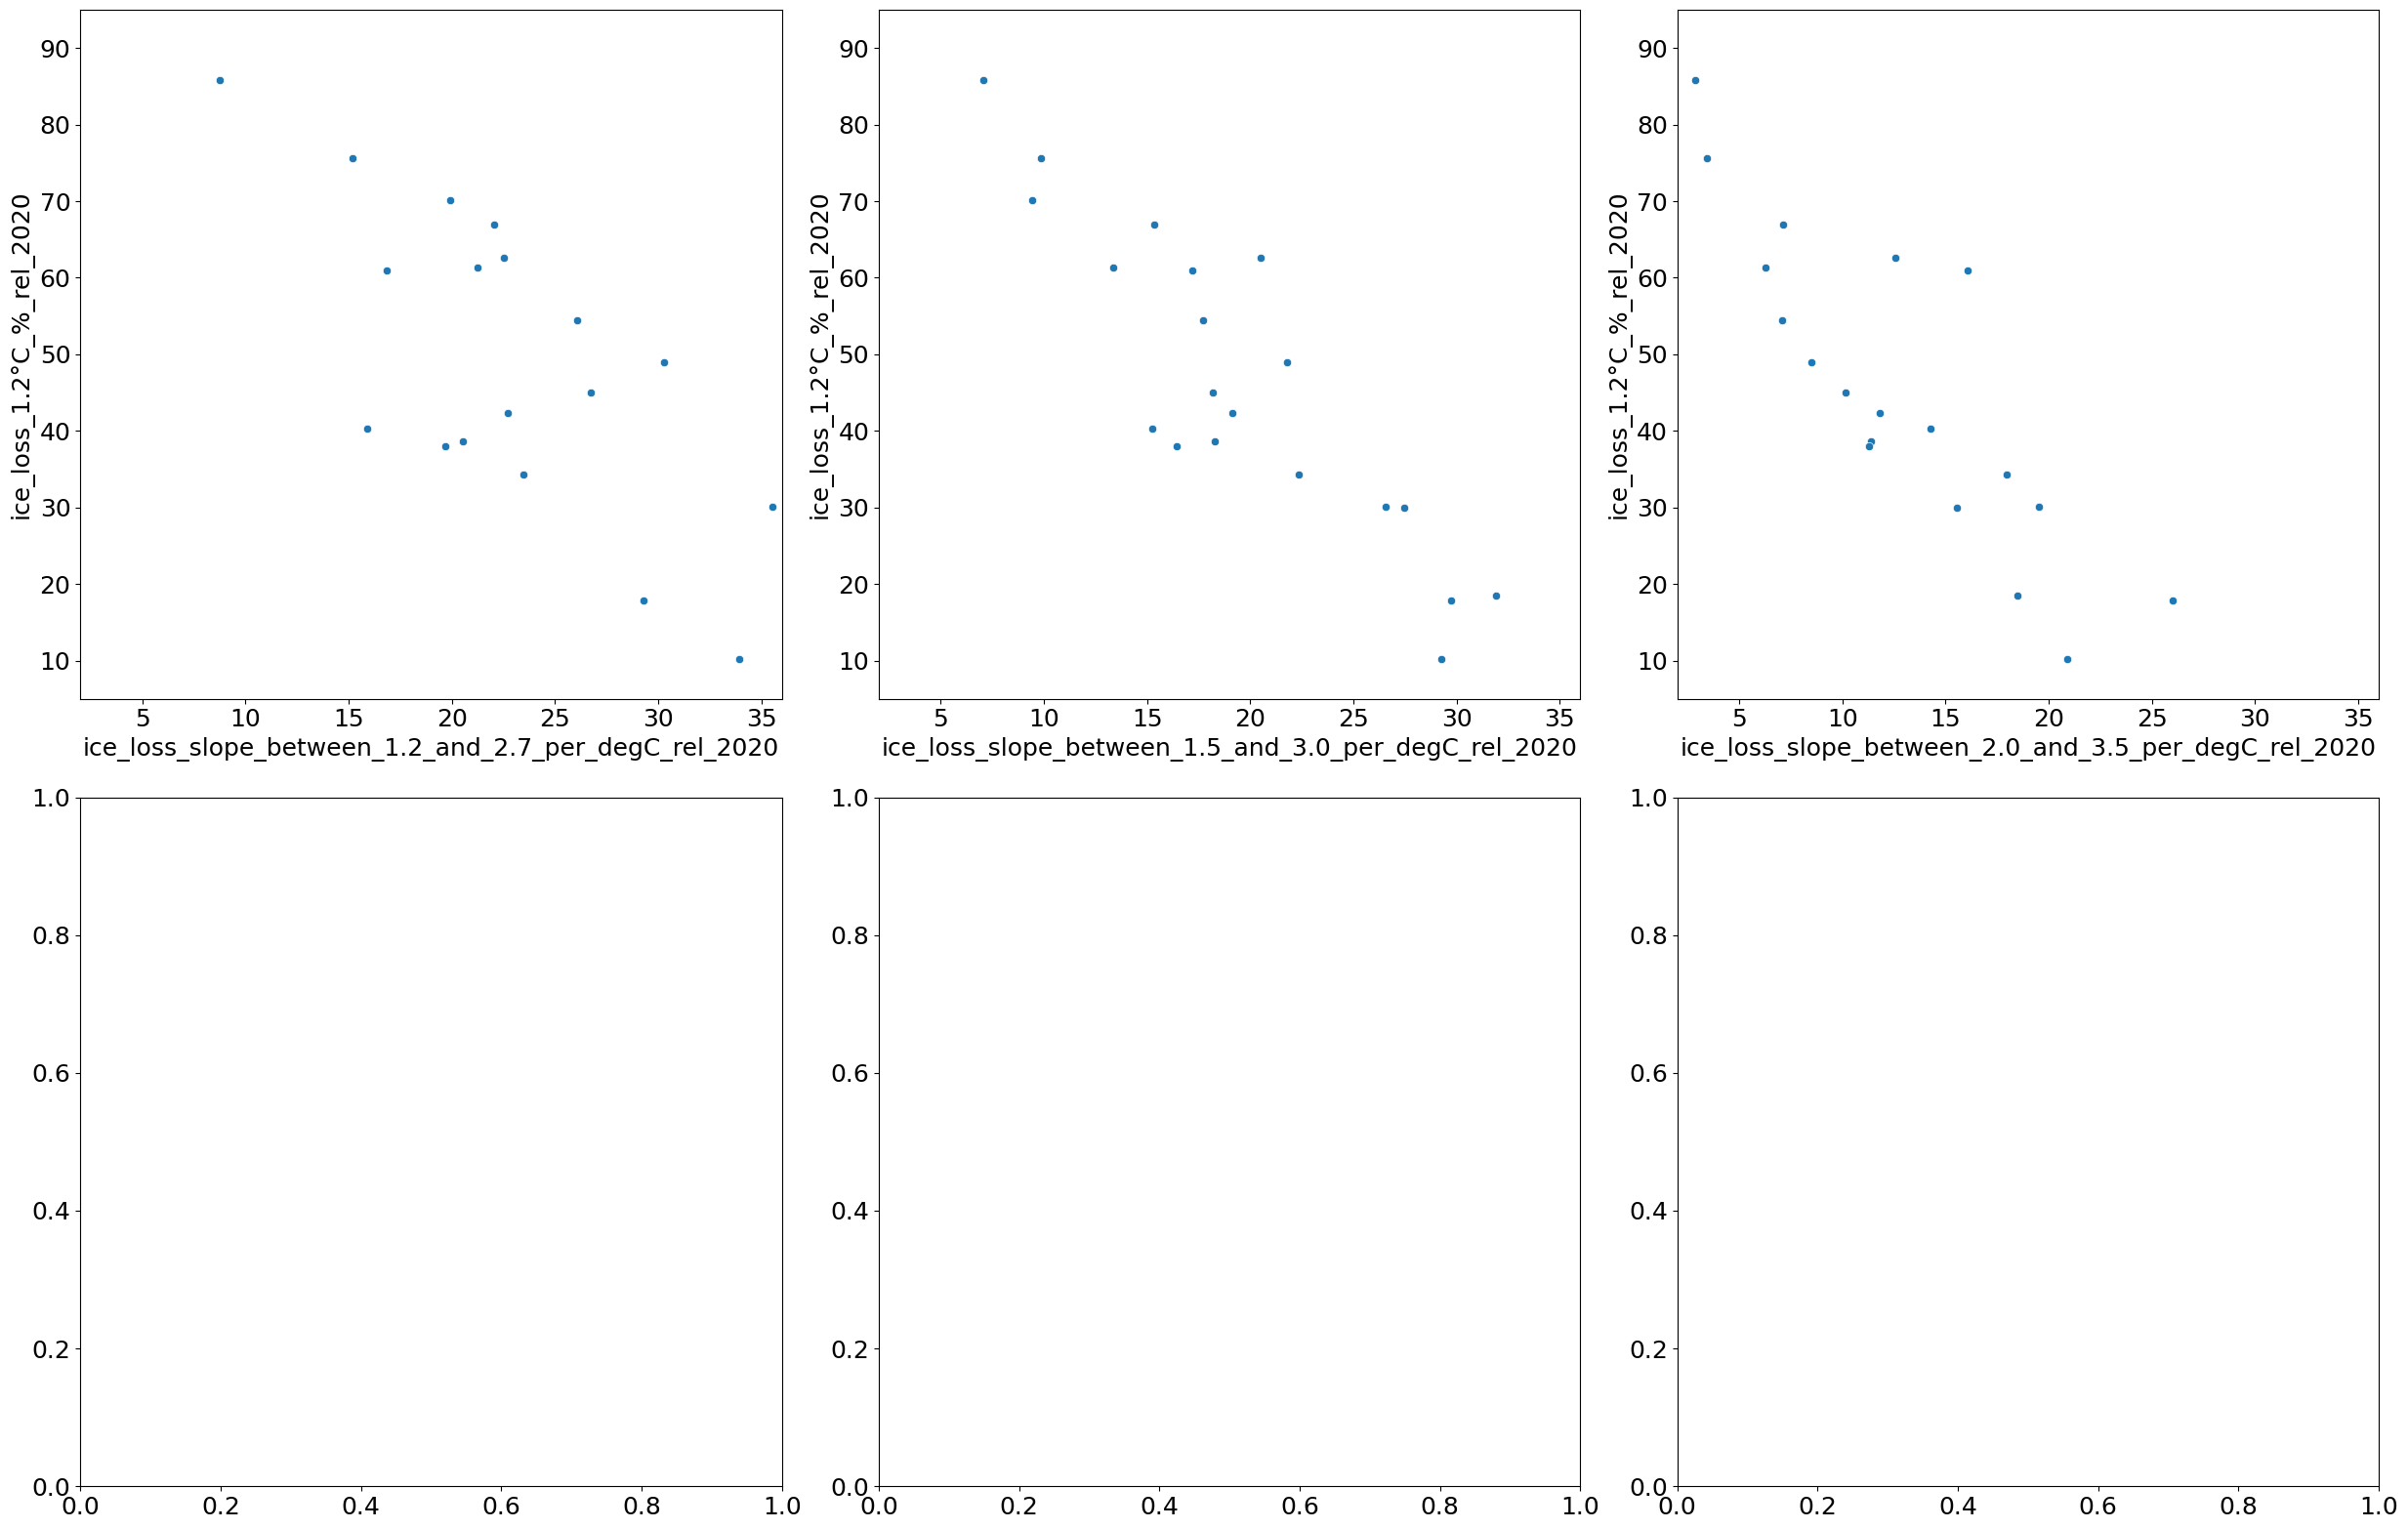

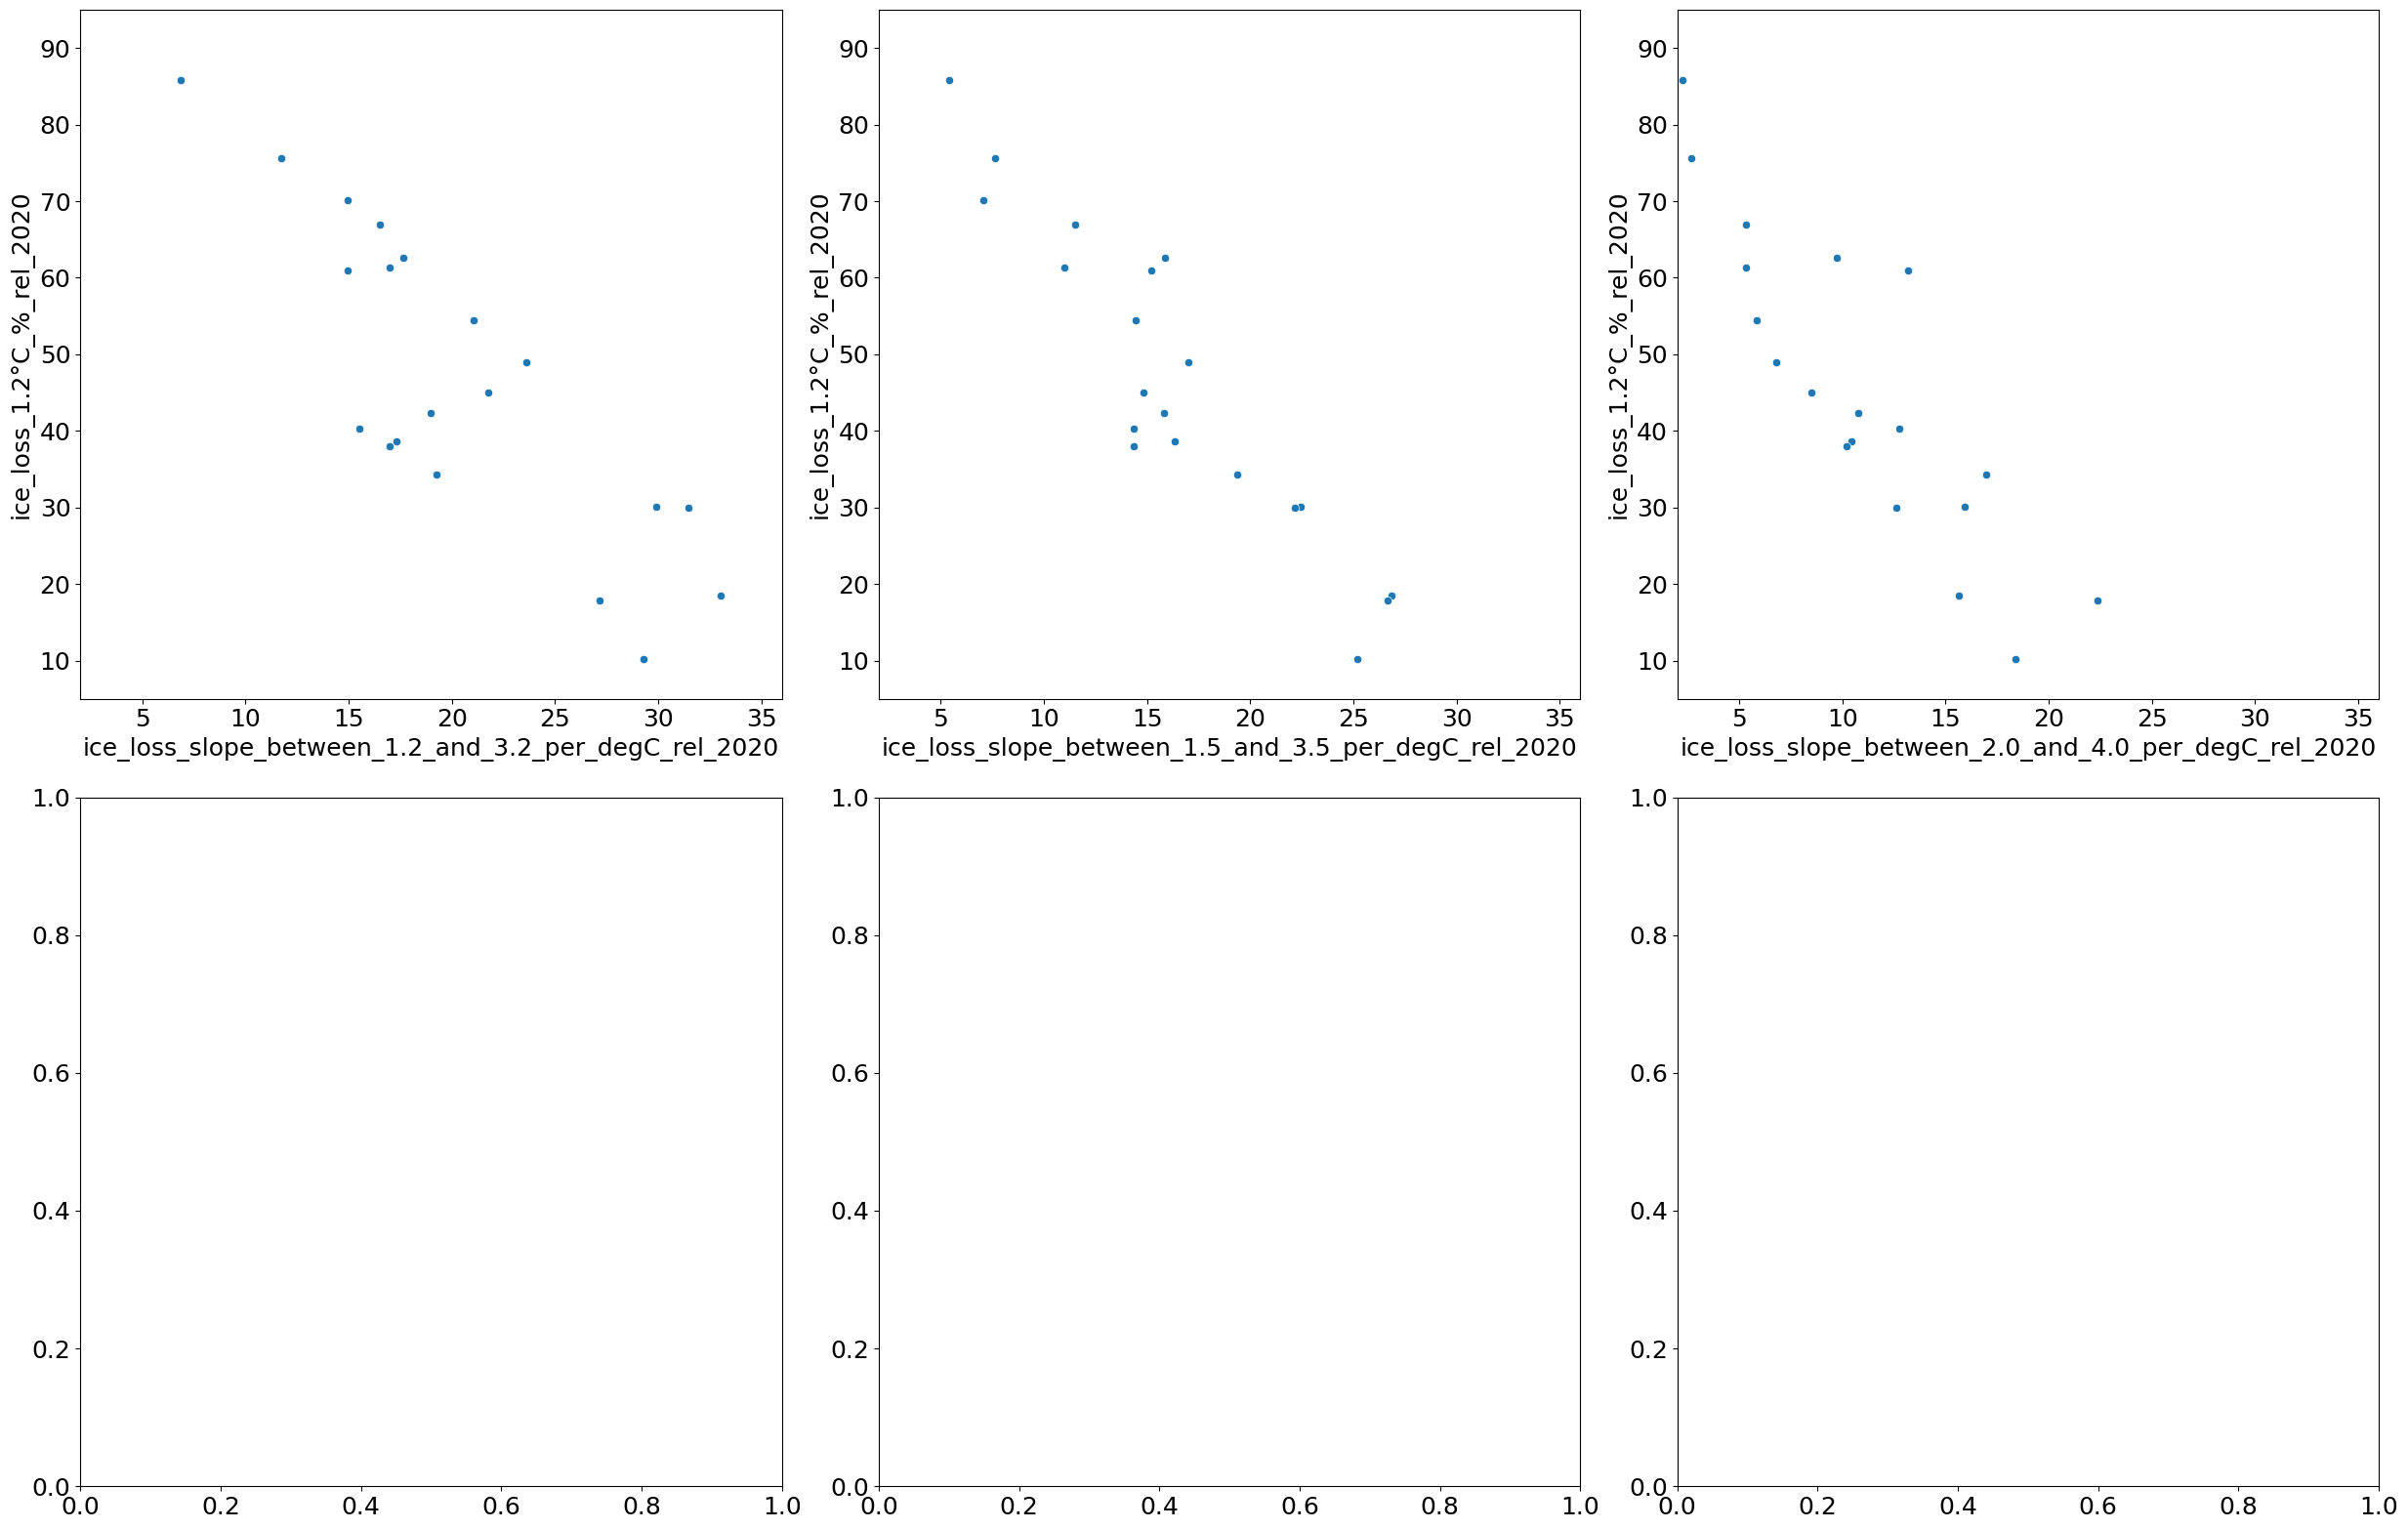

In [8]:
plt.rc('font', size=18)  

for deg_celsius_ch in [1.5, 2.0]:

    fig,axs = plt.subplots(2,3, figsize=(25,16))
    axs = axs.flatten()
    j  = 0

    for rel_add in opts: 
        for temp0 in np.array([1.2,1.5,2.0]):
            temp1 = temp0+deg_celsius_ch
            ax = axs[j]
            sns.scatterplot(data=pd_lowess_ch, x= f'ice_loss_slope_between_{temp0.round(1)}_and_{temp1.round(1)}_per_degC{rel_add}',
                            y=f'ice_loss_1.2°C_%{rel_add}', ax = ax, marker='o')
            ax.set_ylim([5,95])
            ax.set_xlim([2,36])
            j +=1
        plt.tight_layout()


**no real relationship anymore between ice loss slope and elevation range, but still with committed ice loss**

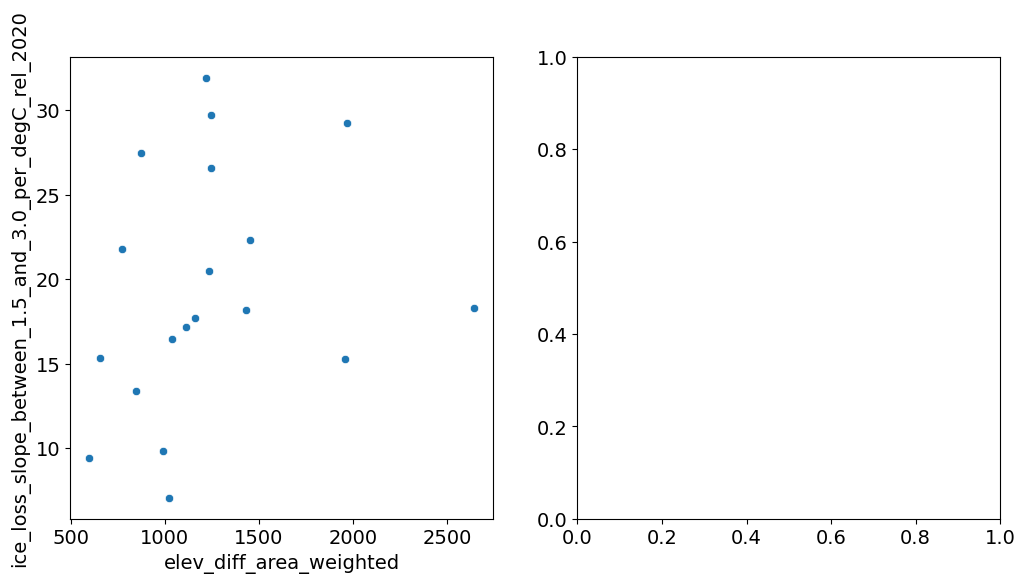

In [9]:
plt.rc('font', size=14)  

fig, axs = plt.subplots(1,2, figsize=(12,6))
for j,rel_add in enumerate(opts): 
    ax = axs[j]
    temp0 = 1.5
    temp1 = 3.0
    sns.scatterplot(data=pd_lowess_ch,ax =ax,
                    y= f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}',
                    x='elev_diff_area_weighted')

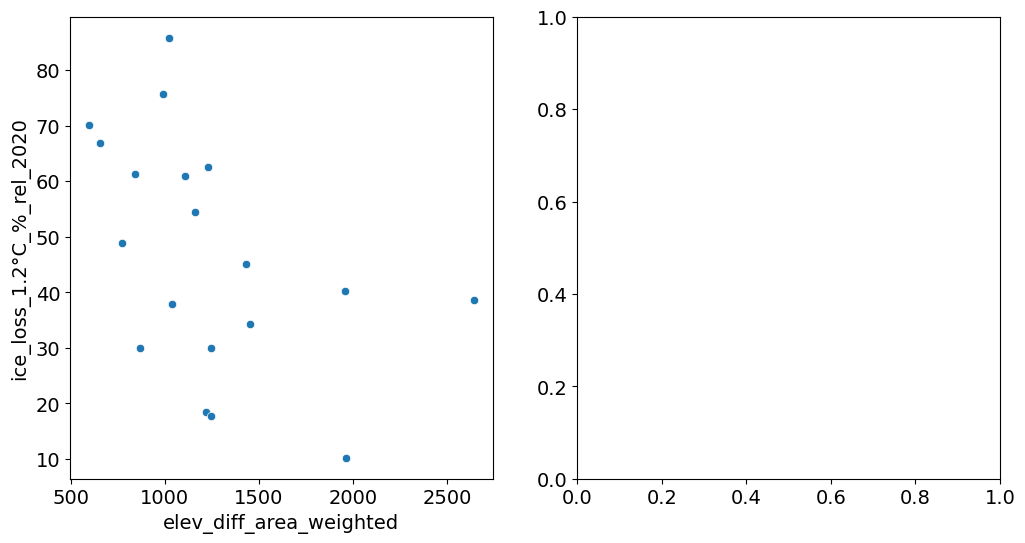

In [10]:
plt.rc('font', size=14)  

fig, axs = plt.subplots(1,2, figsize=(12,6))
for j,rel_add in enumerate(opts): 
    ax = axs[j]
    temp0 = 1.5
    temp1 = 3.0    
    sns.scatterplot(data=pd_lowess_ch,ax =ax,
                    x= f'elev_diff_area_weighted',
                    y=f'ice_loss_1.2°C_%{rel_add}')

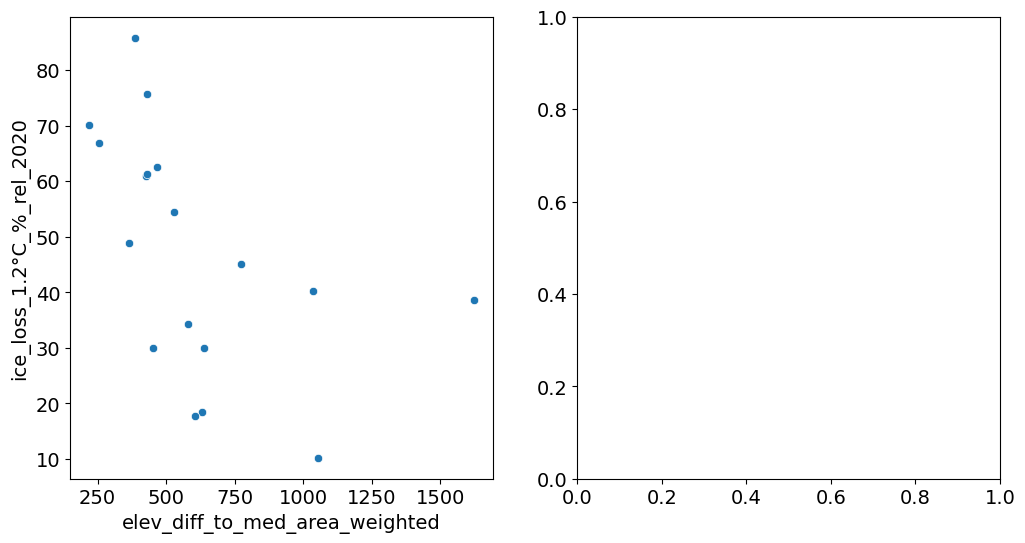

In [11]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
for j,rel_add in enumerate(opts): 
    ax = axs[j]

    sns.scatterplot(data=pd_lowess_ch,ax =ax,
                    y=f'ice_loss_1.2°C_%{rel_add}',
                    x='elev_diff_to_med_area_weighted')

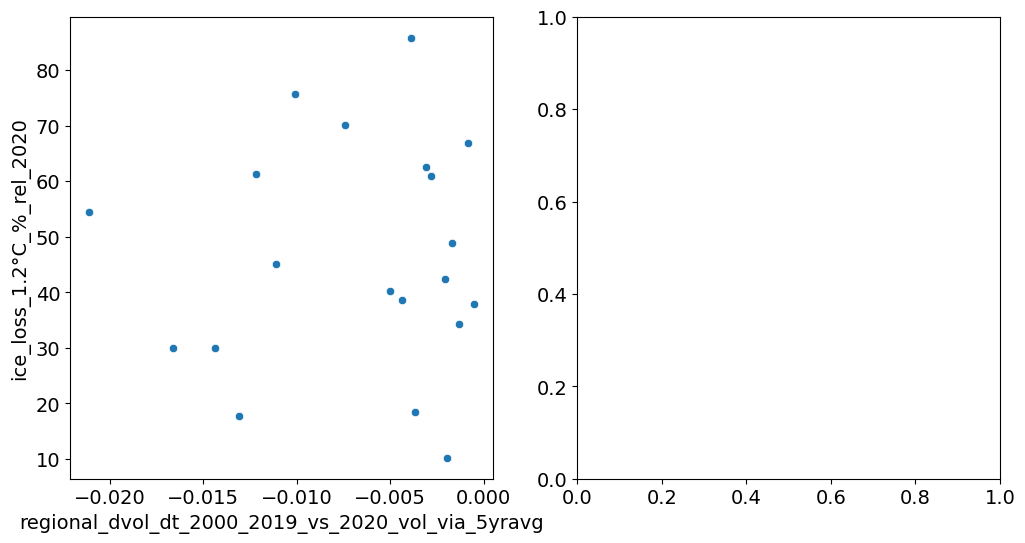

In [12]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
for j,rel_add in enumerate(opts): 
    ax = axs[j]
    temp0 = 1.5
    temp1 = 3.0
    sns.scatterplot(data=pd_lowess_ch,ax =ax,
                    y= f'ice_loss_1.2°C_%{rel_add}',
                    x=f'regional_dvol_dt_2000_2019_vs_2020_vol{approach}')

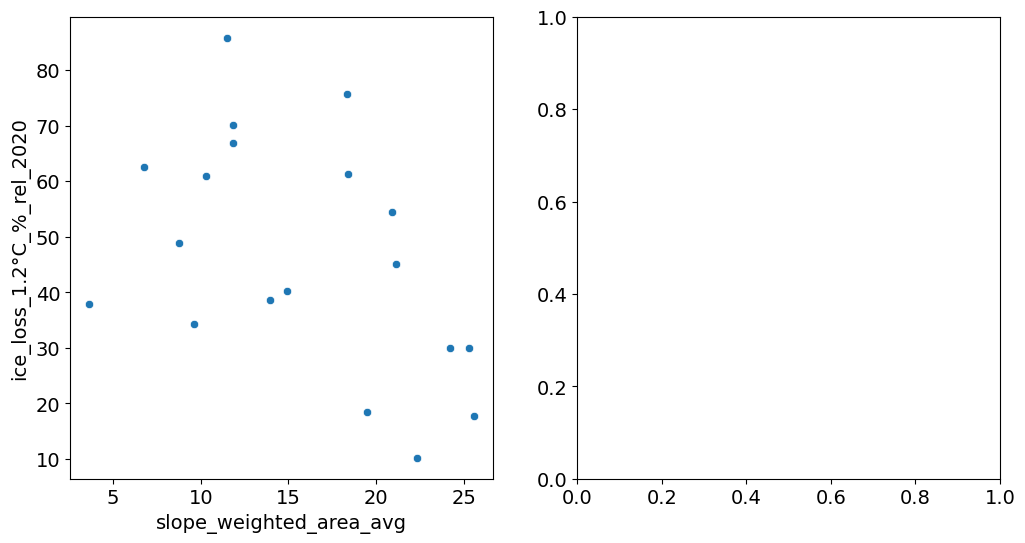

In [13]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
for j,rel_add in enumerate(opts): 
    ax = axs[j]
    temp0 = 1.5
    temp1 = 3.0
    sns.scatterplot(data=pd_lowess_ch,ax =ax,
                    y= f'ice_loss_1.2°C_%{rel_add}',
                    x='slope_weighted_area_avg')

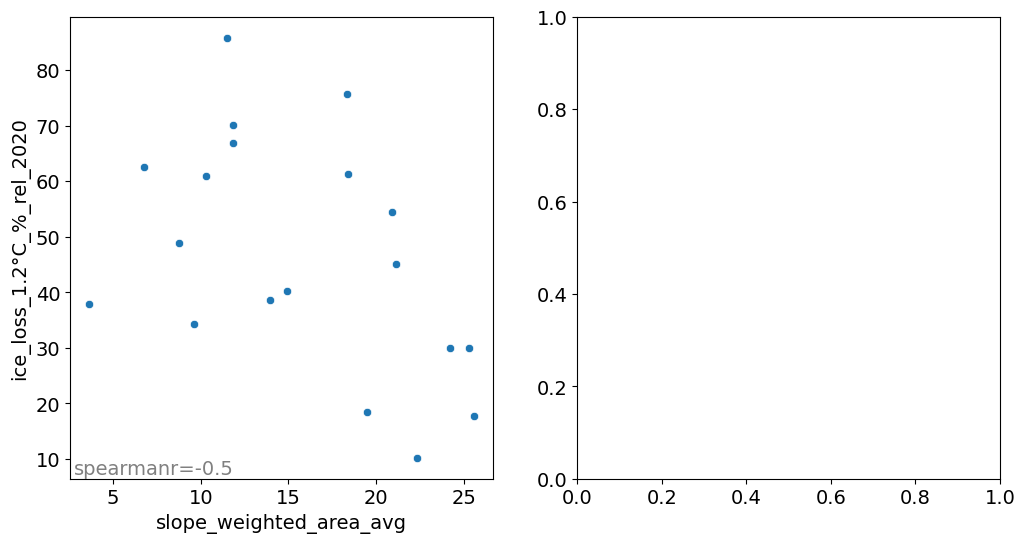

In [14]:
print_spearman = True
fig, axs = plt.subplots(1,2, figsize=(12,6))
for j,rel_add in enumerate(opts): 
    ax = axs[j]
    temp0 = 1.5
    temp1 = 3.0
    sns.scatterplot(data=pd_lowess_ch,ax =ax,
                    y= f'ice_loss_1.2°C_%{rel_add}',
                    x='slope_weighted_area_avg')
    corrcoef,pval = spearmanr(pd_lowess_ch[['slope_weighted_area_avg',f'ice_loss_1.2°C_%{rel_add}']].dropna()['slope_weighted_area_avg'].values,
                              pd_lowess_ch[['slope_weighted_area_avg',f'ice_loss_1.2°C_%{rel_add}']].dropna()[f'ice_loss_1.2°C_%{rel_add}'].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'spearmanr={corrcoef}', transform=ax.transAxes, color='grey')

<AxesSubplot:xlabel='slope_fit_reg_vs_glob_ch', ylabel='median_reg_vs_glob_temp_ch_1.5_3.0'>

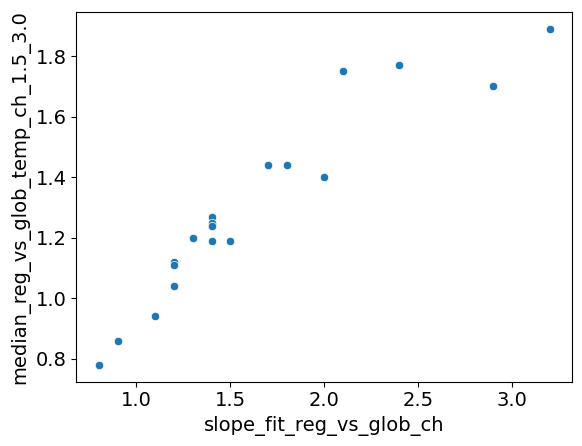

In [15]:
#sns.scatterplot(x='slope_fit_reg_vs_glob_ch', y='median_reg_vs_glob_ch',  data=df)
#             'median_reg_vs_glob_temp_ch_0.8_1.5','median_reg_vs_glob_temp_ch_1.5_3.0',            

#sns.scatterplot(x='slope_fit_reg_vs_glob_ch', y='median_reg_vs_glob_temp_ch_0.8_1.5',  data=df)
sns.scatterplot(x='slope_fit_reg_vs_glob_ch', y='median_reg_vs_glob_temp_ch_1.5_3.0',  data=df)

<AxesSubplot:xlabel='median_reg_vs_glob_temp_ch_0.8_1.5', ylabel='ice_loss_1.2°C_%_rel_2020'>

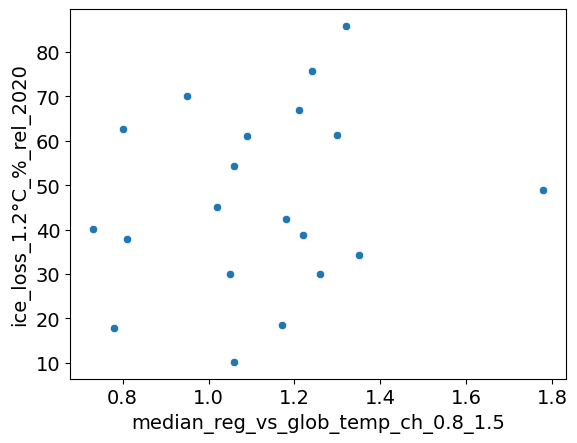

In [16]:
sns.scatterplot(y='ice_loss_1.2°C_%_rel_2020',
                x = 'median_reg_vs_glob_temp_ch_0.8_1.5', #'median_reg_vs_glob_temp_ch_1.5_3.0',
                data=pd_lowess_ch)

<AxesSubplot:xlabel='median_reg_vs_glob_temp_ch_1.5_3.0', ylabel='ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020'>

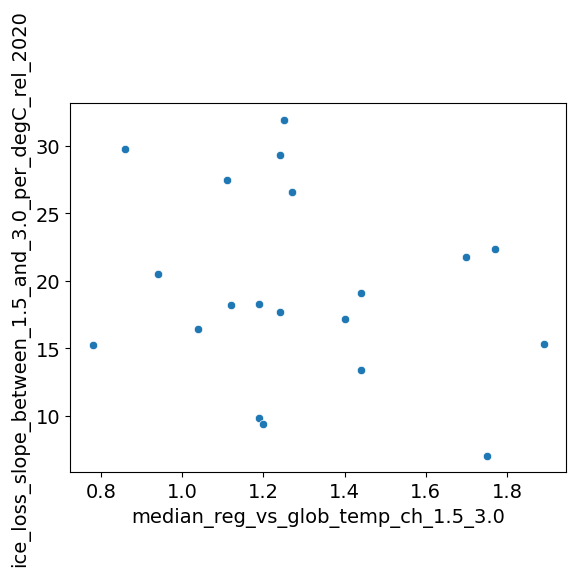

In [17]:
sns.scatterplot(y='ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020', #'ice_loss_1.2°C_%_rel_2020',
                x='median_reg_vs_glob_temp_ch_1.5_3.0',
                data=pd_lowess_ch)

### K-means clustering

In [18]:
# palette_cb = sns.color_palette(['#785EF0', '#DC267F', '#FE6100', '#FFB000', '#648FFF'])
cols = list(sns.color_palette('colorblind'))
palette_cb = sns.color_palette([cols[5],cols[4],cols[2], cols[7]])

In [19]:
pd_lowess_ch['region'] = pd_lowess_ch.index

In [20]:
def plotlabel(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar+1, label, alpha=0.7, fontsize=20)

def plotlabel_b(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar-3, label, alpha=0.7, fontsize=20)
def plotlabel_bb(xvar, yvar, label, ax=None):
    ax.text(xvar-0.01, yvar-30, label, alpha=0.7, fontsize=20)
def plotlabel_c(xvar, yvar, label, ax=None):
    ax.text(xvar-0.08, yvar+0.02, label, alpha=0.7, fontsize=20)

def plotlabel_cc(xvar, yvar, label, ax=None):
    ax.text(xvar-0.03, yvar-0.06, label, alpha=0.7, fontsize=20)


In [21]:
num_dict = {0:'(a)', 1:'(b)', 2:'(c)', 3:'(d)', 4: '(e)',
            5:'(f)', 6:'(g)', 7:'(h)', 8:'(i)', 9:'(j)',
            10:'(k)', 11:'(l)', 12:'(m)'} 

In [239]:
print(f'lowess_fit_cluster{k}_{rel_add}_{avg_over}_{add}{norm_add}{DATE}.csv')

lowess_fit_cluster3__rel_2020_101yr__lowess_added_quantiles_added_clusters_normalisedFeb12_2024.csv


Labels:
[0 0 2 0 2 2 0 0 2 2 2 2 0 1 1 0 0 0 1 0]
100.0
-0.8406015037593983


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


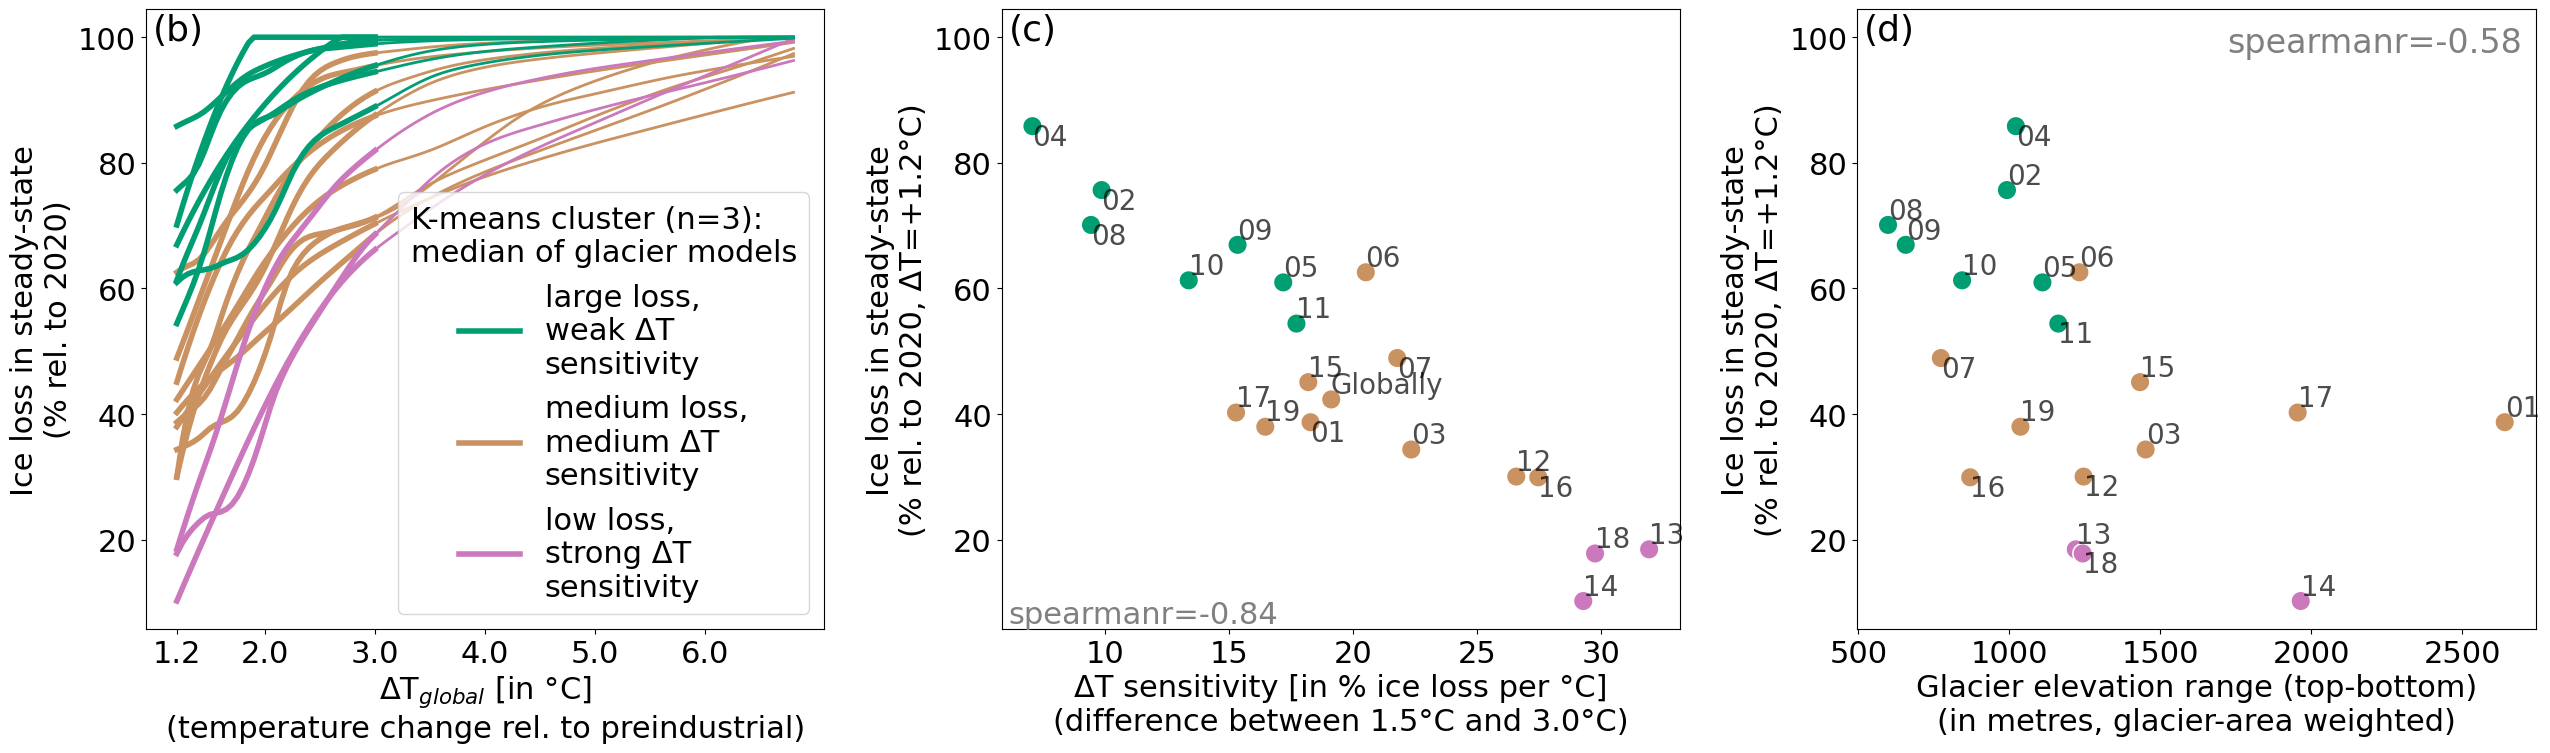

In [22]:
norm = True
if norm:
    norm_add = '_clusters_normalised'
else:
    norm_add = ''
regions = pd_lowess_ch.index.values
temp0 = 1.5
temp1 = 3.0
## limits for the K-meansclustering 
upper_lim = 3.0
lower_lim =1.2
#data = pd_lowess_ch[['ice_loss_1.2°C_%',
#                     f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC']].values
# let's rather use all data above 1.2 
# todo: (and maybe also below a certain temperature threshold to cluster the
# regions?
add_response_time  = False # we will show that separately instead
for k in [3]: #,4]: 
    for j,rel_add in enumerate(opts): 
        pd_ice_loss_reg = pd_sel.loc[(pd_sel.x>=1.199)&(pd_sel.x<=upper_lim)][[f'ice_loss{rel_add}', 'region', 'x']]
        pd_ice_loss_reg = pd_ice_loss_reg.reset_index(drop=True)
        pd_ice_loss_reg = pd_ice_loss_reg.loc[pd_ice_loss_reg.region != '0']
        pd_ice_loss_reg.index = pd_ice_loss_reg.x.round(6)
        temp_array = np.arange(lower_lim,upper_lim+0.01,0.05)
        pd_ice_loss_reg = pd_ice_loss_reg.loc[temp_array.astype(float).round(6)]
        pd_ice_loss_reg = pd_ice_loss_reg.reset_index(drop =True)

        pd_ice_loss_reg = pd_ice_loss_reg.pivot_table(columns='x', index='region',
                                                      values=f'ice_loss{rel_add}') 
        pd_ice_loss_reg =  pd_ice_loss_reg.dropna(axis=1)
        #assert len(pd_ice_loss_reg.columns) == len(temp_array)
        if norm: 
            pd_vol_all_norm = pd.DataFrame(normalize(pd_ice_loss_reg.loc[regions], axis=1)) 
            # axis = 0 makes the normalisation differently, but I found axis=0 creating more meaningful clustes ... 
            #pd_vol_all_norm = pd_vol_all_norm
            data = pd_vol_all_norm.values
        else:
            data = pd_ice_loss_reg.loc[regions].values 
        # Perform K-meansa clustering
        kmeans = KMeans(n_clusters=k, n_init=100, max_iter=1000, random_state=42)
        labels = ['test']
        #while np.any(labels != np.array([2, 0, 1, 0, 2, 2, 3, 3, 1, 
        #                                 1, 1, 1, 3, 0, 0, 2, 3, 0, 0, 0])):
        # [0, 0, 3, 0, 1, 2, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0]
        # 
        #while np.any(labels!=np.array([[0, 0, 1, 0, 1, 2, 2, 2, 3, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0]])):
        kmeans.fit(data)

        # Get the resulting centroids and labels
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_

        # Print the resulting centroids and labels
        #print("Centroids:")
        #print(centroids)
        print("Labels:")
        print(labels)
        if rel_add == '_rel_farinotti':
            pd_ice_loss_reg_rel_farinotti = pd_ice_loss_reg.copy()
        else:
            pd_ice_loss_reg_rel_2020 = pd_ice_loss_reg.copy()
        pd_lowess_ch[f'kmeans_cluster_{k}{rel_add}'] = labels
        print(pd_ice_loss_reg.max().max())
        pd_lowess_ch.to_csv(f'lowess_fit_cluster{k}_{rel_add}_{avg_over}_{add}{norm_add}{DATE}.csv')

    plt.rc('font', size=22)  
    r=1

    for j,rel_add in enumerate(opts): 

        if rel_add == '_rel_farinotti':
            pd_ice_loss_reg = pd_ice_loss_reg_rel_farinotti.copy()
        else:
            pd_ice_loss_reg = pd_ice_loss_reg_rel_2020.copy()
        if add_response_time:
            c=4
            plt.figure(figsize=(32,8))
        else:
            c=3
            plt.figure(figsize=(26,8))

        ax=plt.subplot(r,c,1)

        for kk in np.arange(0,k, 1):
            _pd_sel = pd_lowess_ch.loc[pd_lowess_ch[f'kmeans_cluster_{k}{rel_add}'] == kk]
            for reg in _pd_sel.index:
                #pd_sel_reg = _pd_sel.loc[reg]
                _vol_ch = pd_ice_loss_reg.loc[reg]
                ax.plot(_vol_ch.index, # global temperature change ... 
                        _vol_ch.values,
                        label=reg,
                        color=palette_cb[kk],lw=4, alpha = 1)
                sns.lineplot(data=pd_sel.loc[(pd_sel.region==reg)&(pd_sel['x']>=1.2)],
                             x='x', y=f'ice_loss{rel_add}', lw=2, color=palette_cb[kk], legend=True)

        if rel_add == '_rel_farinotti':
            ax.set_ylabel('Ice loss in steady-state\n(% rel. to Farinotti)') 
        else:
            ax.set_ylabel('Ice loss in steady-state\n(% rel. to 2020)') 

        ax.set_xlabel(r'ΔT$_{global}$ [in °C]'+'\n(temperature change rel. to preindustrial)')
        ax.set_xticks([1.2,2,3,4,5,6])

        if (rel_add == '_rel_2020') & (k==3):
            handles, labels = ax.get_legend_handles_labels()
            # handles_l = [handles[0], handles[13],handles[18],handles[10]]
            a = [handles[11], handles[0],handles[-1]][::-1]
            labels_long_cluster = [r'large loss'+',\nweak ΔT\nsensitivity',
                                   r'medium loss'+',\nmedium ΔT\nsensitivity',
                                   r'low loss'+',\nstrong ΔT\nsensitivity', ]
            ax.legend(a,labels_long_cluster,
                      title = 'K-means cluster (n=3):\nmedian of glacier models', fontsize=22)        
        else:
            ax.get_legend().remove()
        ax1=ax
        
        ax=plt.subplot(r,c,2)
        xx=f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}'
        yy=f'ice_loss_1.2°C_%{rel_add}'
        temp0 = 1.5
        temp1 = 3.0
        sns.scatterplot(data=pd_lowess_ch, x= xx,
                            y=yy, ax = ax,hue=f'kmeans_cluster_{k}{rel_add}',
                                 palette=palette_cb[:k], s=200, legend = False)
        _plotlabel = plotlabel
        print_spearman = True
        corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
        print(corrcoef)
        corrcoef = corrcoef.round(2)
        if (pval <0.05) and print_spearman:
            ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
                    transform=ax.transAxes, color='grey', fontsize=22)
        #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
        pd_lowess_ch.drop(['01','04','02','07','16','08']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
        pd_lowess_ch.loc[['01','04','02','07','16','08']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
        ax.set_xlabel(r'ΔT sensitivity [in % ice loss per °C]'+f'\n(difference between {np.round(temp0,1)}°C and {np.round(temp1,1)}°C)')

        if rel_add == '_rel_farinotti':
            ax.set_ylabel('Ice loss in steady-state\n(% rel. to Farinotti, ΔT=+1.2°C)') 
        else:
            ax.set_ylabel('Ice loss in steady-state\n(% rel. to 2020, ΔT=+1.2°C)') 

        #ax.set_ylabel('Ice loss in steady-state\n(% rel. to initial state, ΔT=+1.2°C)') 

        ax2=ax
        ax=plt.subplot(r,c,3)
        top_to_median = False
        if top_to_median:
            drop_l = ['04','11','07','16','12','13','05']
            ax.set_xlabel(f'Glacier elevation range (top-median)\n(in metres, glacier-area weighted)')
            xx = 'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #

        else:
            drop_l = ['04','11','07','16','12','18']
            xx = 'elev_diff_area_weighted'
            ax.set_xlabel(f'Glacier elevation range (top-bottom)\n(in metres, glacier-area weighted)')

        yy = f'ice_loss_1.2°C_%{rel_add}'
        sns.scatterplot(data=pd_lowess_ch,
                        y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                        x=xx,
                        hue=f'kmeans_cluster_{k}{rel_add}',
                        palette=palette_cb[:k], s=200, legend = False)
        print_spearman = True
        corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
        corrcoef = corrcoef.round(2)
        if (pval <0.05) and print_spearman:
            ax.text(0.98,0.93, f'spearmanr={corrcoef}', ha='right',
                    transform=ax.transAxes, color='grey', fontsize=24)
        #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
        pd_lowess_ch.drop(drop_l).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
        pd_lowess_ch.loc[drop_l].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
        if rel_add == '_rel_farinotti':
            ax.set_ylabel('Ice loss in steady-state\n(% rel. to Farinotti, ΔT=+1.2°C)') 
        else:
            ax.set_ylabel('Ice loss in steady-state\n(% rel. to 2020, ΔT=+1.2°C)')


        ax3=ax
  
        if (rel_add == '_rel_2020') & (k==3):
            num_text_x = 0.01
            num_text_y = 0.95
            if add_response_time: 
                ax=plt.subplot(r,c,4)
                ax=plt.gca()
                yy2='resp_time_-80%_1_5_deg'
                ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
                xx2 = f'resp_time_-50%_1_5_deg'
                xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'

                xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
                yy = 'resp_time_-80%_1_5_deg'
                sns.scatterplot(data=pd_lowess_ch,
                                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                                x=xx,
                                hue=f'kmeans_cluster_{k}{rel_add}',
                                palette=palette_cb[:k], s=200, legend = False)
                print_spearman = True
                corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
                corrcoef = corrcoef.round(2)
                if (pval <0.05) and print_spearman:
                    ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
                            transform=ax.transAxes, color='grey', fontsize=22)
                #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
                pd_lowess_ch.drop(['11','10','19','16','17']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
                pd_lowess_ch.loc[['11','10','19','16','17']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)

                ax.set_ylabel(ylabel)

                ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted)')


                plt.ylim([-2,890])

                inset_ax = inset_axes(ax,
                                    width="37%", # width = 30% of parent_bbox
                                    height="36%", # height : 1 inch
                                    loc='upper right',
                                    #bbox_to_anchor=(1, 0.9, 0, 0),
                                       )
                #inset_ax.set_title(' t\n t', alpha =0)
                sns.scatterplot(df,y=yy2,x=xx2,ax=inset_ax, color='black')
                inset_ax.set_xlabel('year (50%)')
                inset_ax.set_ylabel('year (80%)') 
                #_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
                inset_ax.text(num_text_x, num_text_y*0.9,
                         num_dict[5], fontsize=26, transform=inset_ax.transAxes)

                #plt.text(0.99, 0.99,
                #         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
                #         transform=inset_ax.transAxes)
                #plt.ylim([-2,840])
                #inset_ax.grid(alpha=0.5)

                inset_ax.set_aspect('equal')
                ylim0,ylim1 = inset_ax.get_ylim()
                xlim0,xlim1 = inset_ax.get_xlim()
                lim0 = min(ylim0, xlim0)
                lim1 = max(ylim1, xlim1)
                inset_ax.set_xlim([lim0, lim1])
                inset_ax.set_ylim([lim0, lim1])

                inset_ax.set_xticks(np.arange(0,lim1,300))
                inset_ax.set_yticks(np.arange(0,lim1,300))

                ax.text(0.99,0.45, f"{np.nanmedian(df[yy2]/df[xx2]).round(1)} times longer\nfor 80% vs 50%\nof total changes", fontsize=22,
                 transform=ax.transAxes, ha='right', va='top', color='lightgrey')
                ax4=ax

                num_text_x = 0.01
                for j,axi in enumerate([ax1,ax2,ax3, ax4]):
                    num_text_y = 0.95
                    axi.text(num_text_x, num_text_y,
                             num_dict[j+1], fontsize=26, transform=axi.transAxes)
                    if j<3:
                        axi.set_ylim(ax1.get_ylim())
                plt.tight_layout()
                plt.savefig(f'figures/fig3_second_plot_{DATE}.png')
                
            else:
                num_text_x = 0.01
                for j,axi in enumerate([ax1,ax2,ax3]):
                    num_text_y = 0.95
                    axi.text(num_text_x, num_text_y,
                             num_dict[j+1], fontsize=26, transform=axi.transAxes)
                    if j<3:
                        axi.set_ylim(ax1.get_ylim())
                plt.tight_layout()
                plt.savefig(f'figures/fig3_second_plot_{DATE}.png')
                


In [51]:
        top_to_median = False
        if top_to_median:
            drop_l = ['04','11','07','16','12','13','05']
            ax.set_xlabel(f'Glacier elevation range (top-median)\n(in metres, glacier-area weighted)')
            xx = 'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #

        else:
            drop_l = ['04','11','07','16','12','18']
            xx = 'elev_diff_area_weighted'
            ax.set_xlabel(f'Glacier elevation range (top-bottom)\n(in metres, glacier-area weighted)')

        yy = f'ice_loss_1.2°C_%{rel_add}'
        corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
        corrcoef = corrcoef.round(2)

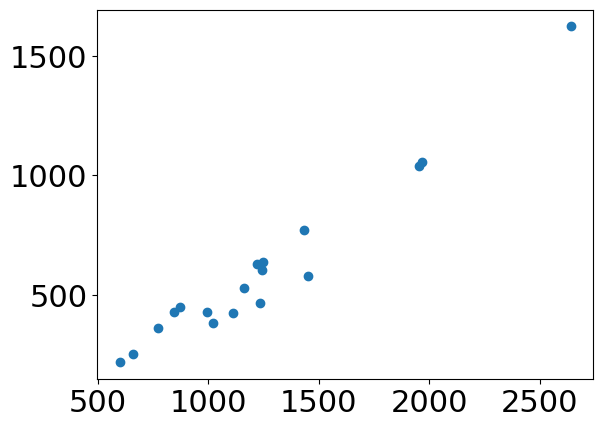

In [23]:
plt.plot(df['elev_diff_area_weighted'], df['elev_diff_to_med_area_weighted'], 'o')

Not a clear rleationshopt to the regional amplified warming ... see fig. below

-0.8406015037593983


region
01    None
04    None
02    None
07    None
15    None
dtype: object

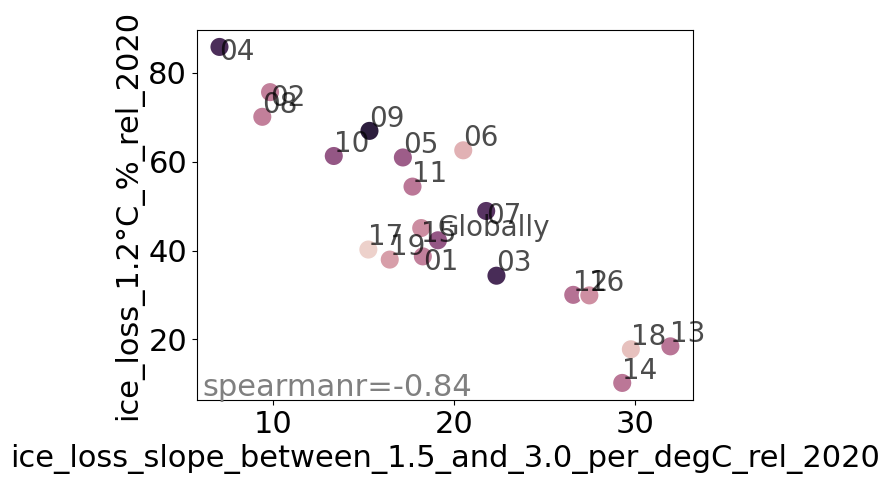

In [24]:
ax = plt.gca()
xx=f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC{rel_add}'

yy=f'ice_loss_1.2°C_%{rel_add}'
temp0 = 1.5
temp1 = 3.0
sns.scatterplot(data=pd_lowess_ch, x= xx,
                    y=yy, ax = ax,hue='median_reg_vs_glob_temp_ch_1.5_3.0',
                         #palette=palette_cb[:k],
                s=200, legend = False)
_plotlabel = plotlabel
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
print(corrcoef)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['01','04','02','07','15']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['01','04','02','07','15']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


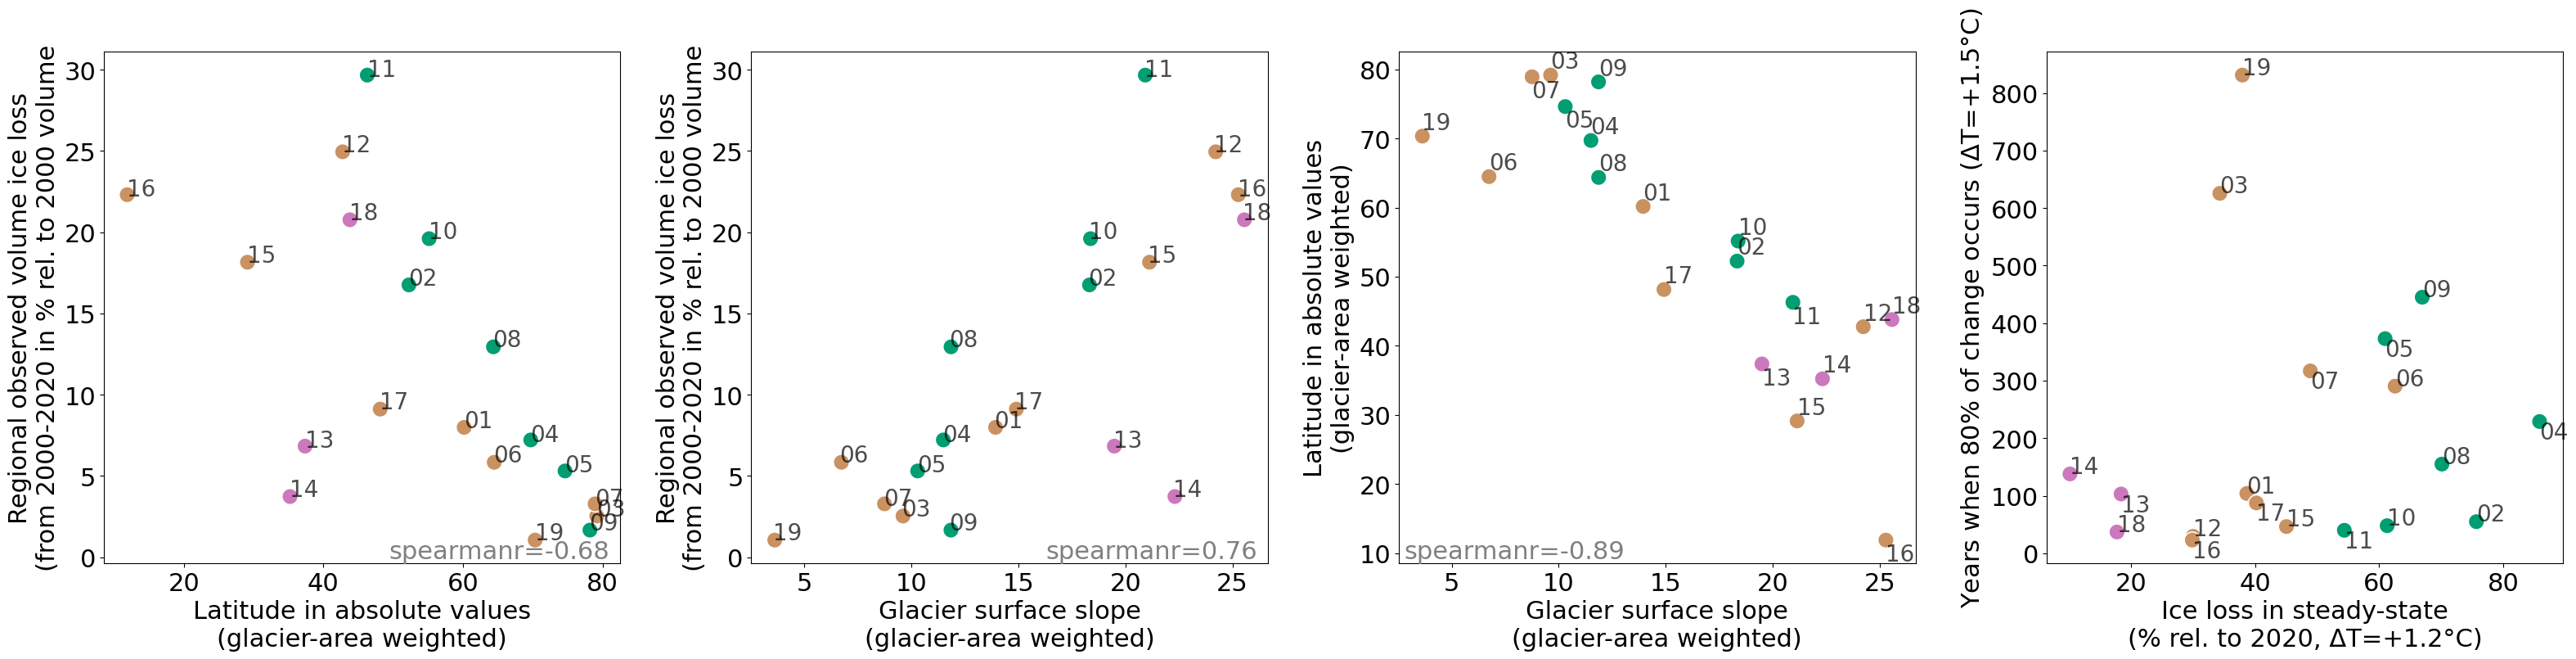

In [25]:
#pd_lowess_ch['lat_abs_weighted_area_avg'] = np.abs(pd_lowess_ch['lat_weighted_area_avg']).values
plt.figure(figsize=(32,8))
r=1
c=4
ax=plt.subplot(r,c,1)
num_text_x = 0.01
num_text_y = 0.95


yy2='lat_absolute_weighted_area_avg'
ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_1_5_deg'

yy=  f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
xx = 'lat_absolute_weighted_area_avg' #'lat_abs_weighted_area_avg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.98,0.01, f'spearmanr={corrcoef}', ha='right',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel_c(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_cc(x[xx],x[yy], x.region, ax=ax), axis=1)
ax.set_ylabel(f'Regional observed volume ice loss\n(from 2000-2020 in % rel. to 2000 volume')
ax.set_xlabel(f'Latitude in absolute values\n(glacier-area weighted)')


ax=plt.subplot(r,c,2)
num_text_x = 0.01
num_text_y = 0.95


yy2=''
ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_1_5_deg'

yy=  f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
xx = 'slope_weighted_area_avg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.98,0.01, f'spearmanr={corrcoef}', ha='right',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel_c(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_cc(x[xx],x[yy], x.region, ax=ax), axis=1)
ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted)')

ax.set_ylabel(f'Regional observed volume ice loss\n(from 2000-2020 in % rel. to 2000 volume')

#ax.set_ylabel(ylabel)

#ax.set_xlabel(f'Regional observed volume change\n(from 2000-2020 in % rel. to 2020 volume')


#äplt.ylim([-2,850])

ax=plt.subplot(r,c,3)
num_text_x = 0.01
num_text_y = 0.95


yy2=''
ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_1_5_deg'

yy=f'lat_absolute_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
xx = 'slope_weighted_area_avg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['05','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['05','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted)')
ax.set_ylabel(f'Latitude in absolute values\n(glacier-area weighted)')


ax=plt.subplot(r,c,4)
num_text_x = 0.01
num_text_y = 0.95



xx=f'ice_loss_1.2°C_%_rel_2020' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.98,0.01, f'spearmanr={corrcoef}', ha='right',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['05','04','11','07','16','13','17']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['05','04','11','07','16','13','17']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)
#ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted)')
#ax.set_ylabel(f'Latitude in absolute values\n(glacier-area weighted)')
ax.set_ylabel(r'Years when 80% of change occurs ($\Delta$T=+1.5°C)')
ax.set_xlabel('Ice loss in steady-state\n(% rel. to 2020, ΔT=+1.2°C)')

plt.tight_layout()


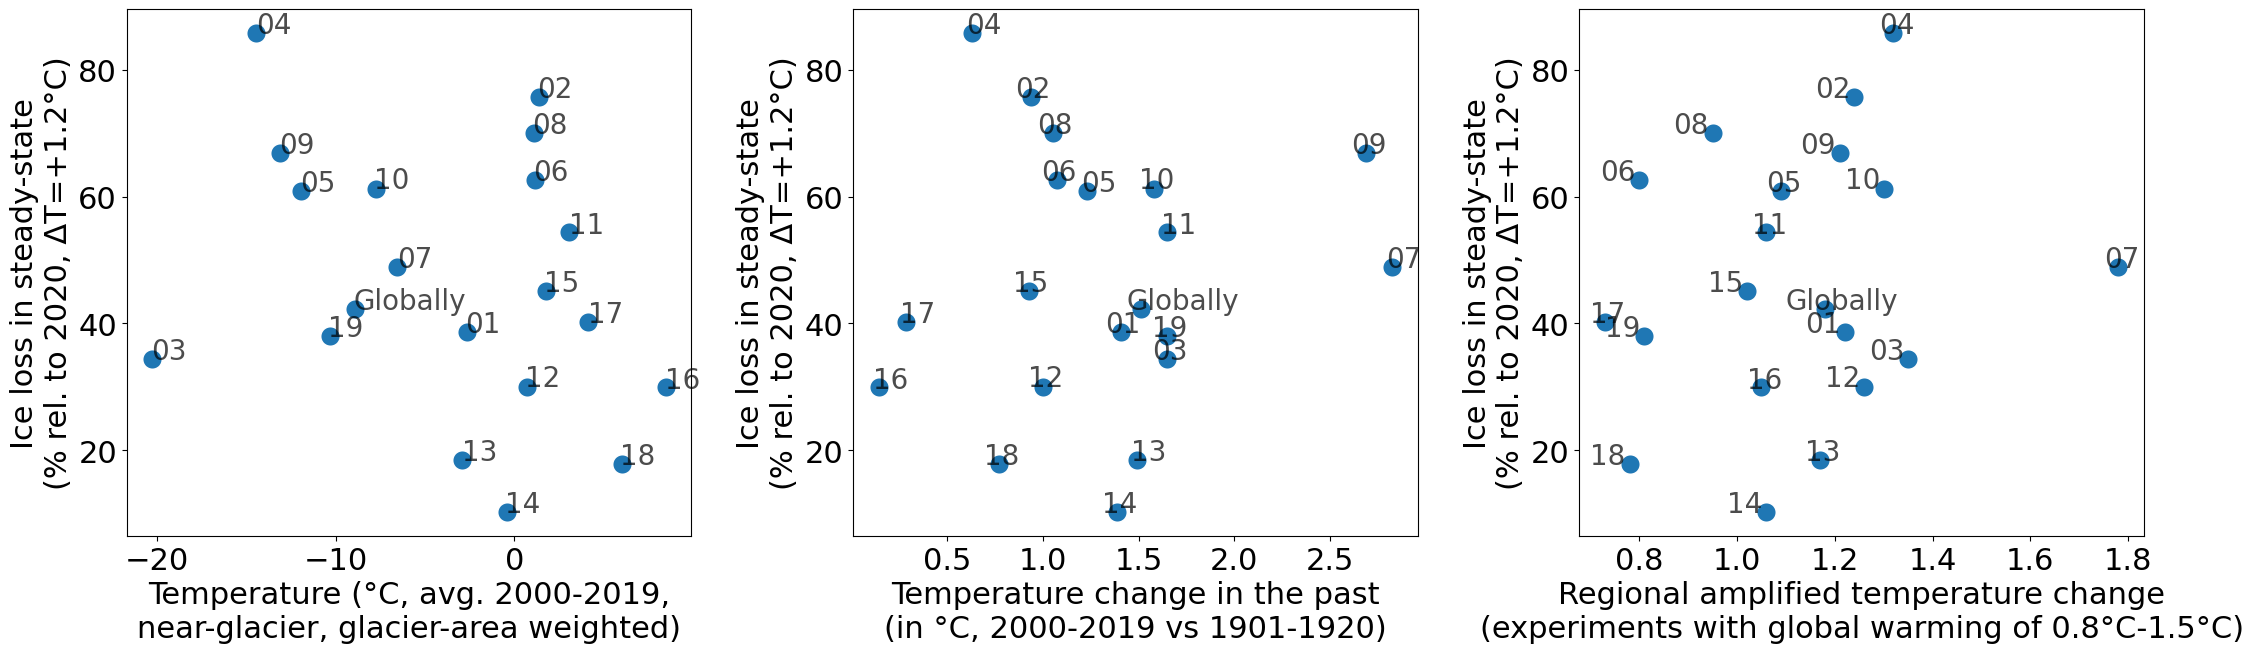

In [26]:
plt.figure(figsize=(22,7))
yy=f'ice_loss_1.2°C_%_rel_2020'
xxs=['temp_avg_2000-2019','temp_ch_avg_2000-2019_vs_1901-1920','median_reg_vs_glob_temp_ch_0.8_1.5']
for j,xx in enumerate(xxs):
    plt.subplot(1,3,j+1)
    ax = plt.gca()
    sns.scatterplot(y=yy,
                    x = xx, #'median_reg_vs_glob_temp_ch_1.5_3.0',
                    data=pd_lowess_ch, ax=ax, s=200)
    print_spearman = True
    corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.98,0.01, f'spearmanr={corrcoef}', ha='right',
                transform=ax.transAxes, color='grey', fontsize=22)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    pd_lowess_ch.drop(['05','04','11','07','16','13','17']).apply(lambda x: plotlabel_c(x[xx],x[yy], x.region, ax=ax), axis=1)
    pd_lowess_ch.loc[['05','04','11','07','16','13','17']].apply(lambda x: plotlabel_cc(x[xx],x[yy], x.region, ax=ax), axis=1)
    #ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted)')
    #ax.set_ylabel(f'Latitude in absolute values\n(glacier-area weighted)')
    #ax.set_ylabel(r'Years when 80% of change occurs ($\Delta$T=+1.5°C)')
    if xx == 'temp_ch_avg_2000-2019_vs_1901-1920':
        ax.set_xlabel('Temperature change in the past\n(in °C, 2000-2019 vs 1901-1920)')
    elif xx == 'temp_avg_2000-2019':
        ax.set_xlabel('Temperature (°C, avg. 2000-2019,\nnear-glacier, glacier-area weighted)')

    else:
        ax.set_xlabel('Regional amplified temperature change\n(experiments with global warming of 0.8°C-1.5°C)')
    ax.set_ylabel('Ice loss in steady-state\n(% rel. to 2020, ΔT=+1.2°C)')
plt.tight_layout()
plt.savefig('figures/3c_scatter_temp_region_ice_loss.png')

- RGI04 is a region where temperatures are one of the coldest and where temp. change in the past (20 last years vs 1901-1920) was relatively small
- RGI04 is a region where one of the largest regional amplified temp. change occurs at current warming levels (so warming levels between 0.8 and 1.5°C) 

Text(0.5, 0, 'Ice loss in steady-state\n(% rel. to 2020, ΔT=+1.2°C)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


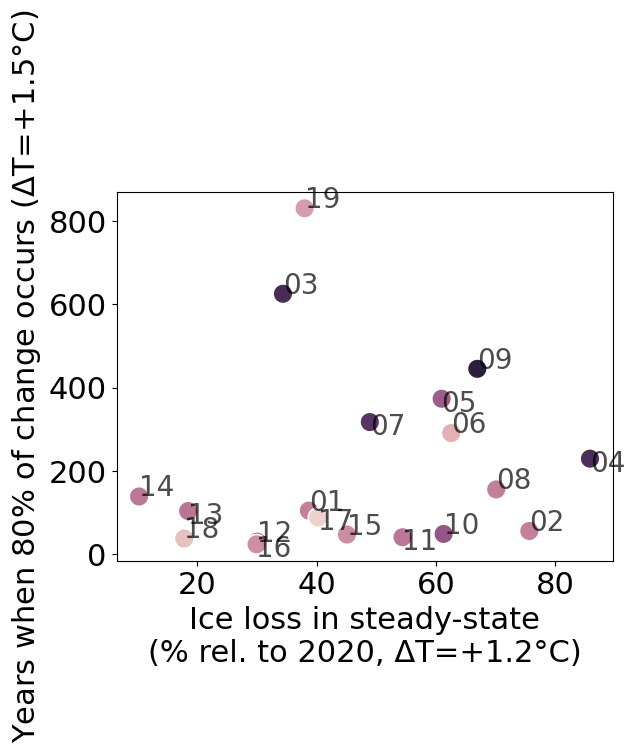

In [27]:
ax = plt.gca()
xx=f'ice_loss_1.2°C_%_rel_2020' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,hue='median_reg_vs_glob_temp_ch_1.5_3.0',
                #hue=f'kmeans_cluster_{k}{rel_add}',
                #palette=palette_cb[:k],
                s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.98,0.01, f'spearmanr={corrcoef}', ha='right',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['05','04','11','07','16','13','17']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['05','04','11','07','16','13','17']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)
#ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted)')
#ax.set_ylabel(f'Latitude in absolute values\n(glacier-area weighted)')
ax.set_ylabel(r'Years when 80% of change occurs ($\Delta$T=+1.5°C)')
ax.set_xlabel('Ice loss in steady-state\n(% rel. to 2020, ΔT=+1.2°C)')

Text(0.5, 0, 'median_reg_vs_glob_temp_ch_1.5_3.0')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


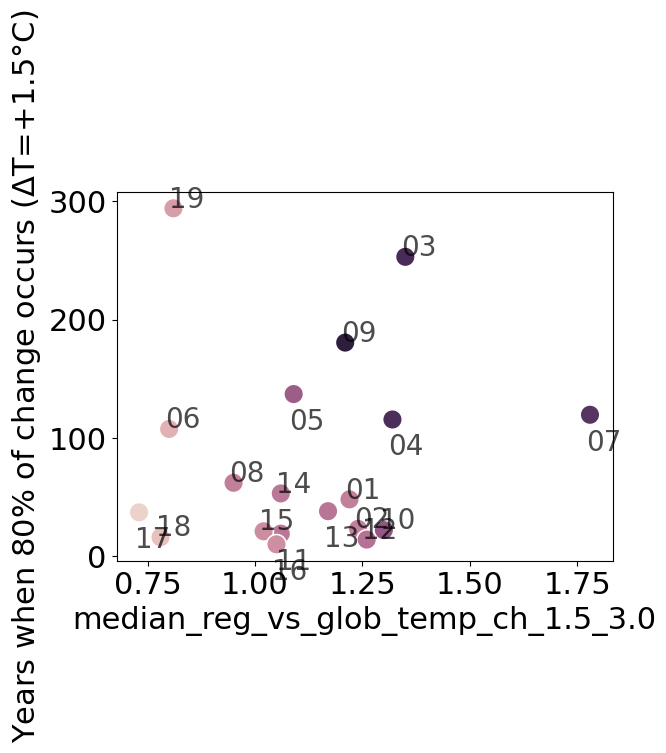

In [28]:
ax = plt.gca()
xx='median_reg_vs_glob_temp_ch_0.8_1.5'#'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-50%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,hue='median_reg_vs_glob_temp_ch_1.5_3.0',
                #hue=f'kmeans_cluster_{k}{rel_add}',
                #palette=palette_cb[:k],
                s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.98,0.01, f'spearmanr={corrcoef}', ha='right',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['05','04','11','07','16','13','17']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['05','04','11','07','16','13','17']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)
#ax.set_xlabel(f'Glacier surface slope\n(glacier-area weighted)')
#ax.set_ylabel(f'Latitude in absolute values\n(glacier-area weighted)')
ax.set_ylabel(r'Years when 80% of change occurs ($\Delta$T=+1.5°C)')
ax.set_xlabel('median_reg_vs_glob_temp_ch_1.5_3.0')

## Fig. 4

/tmp/ipykernel_3628154/1478416320.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


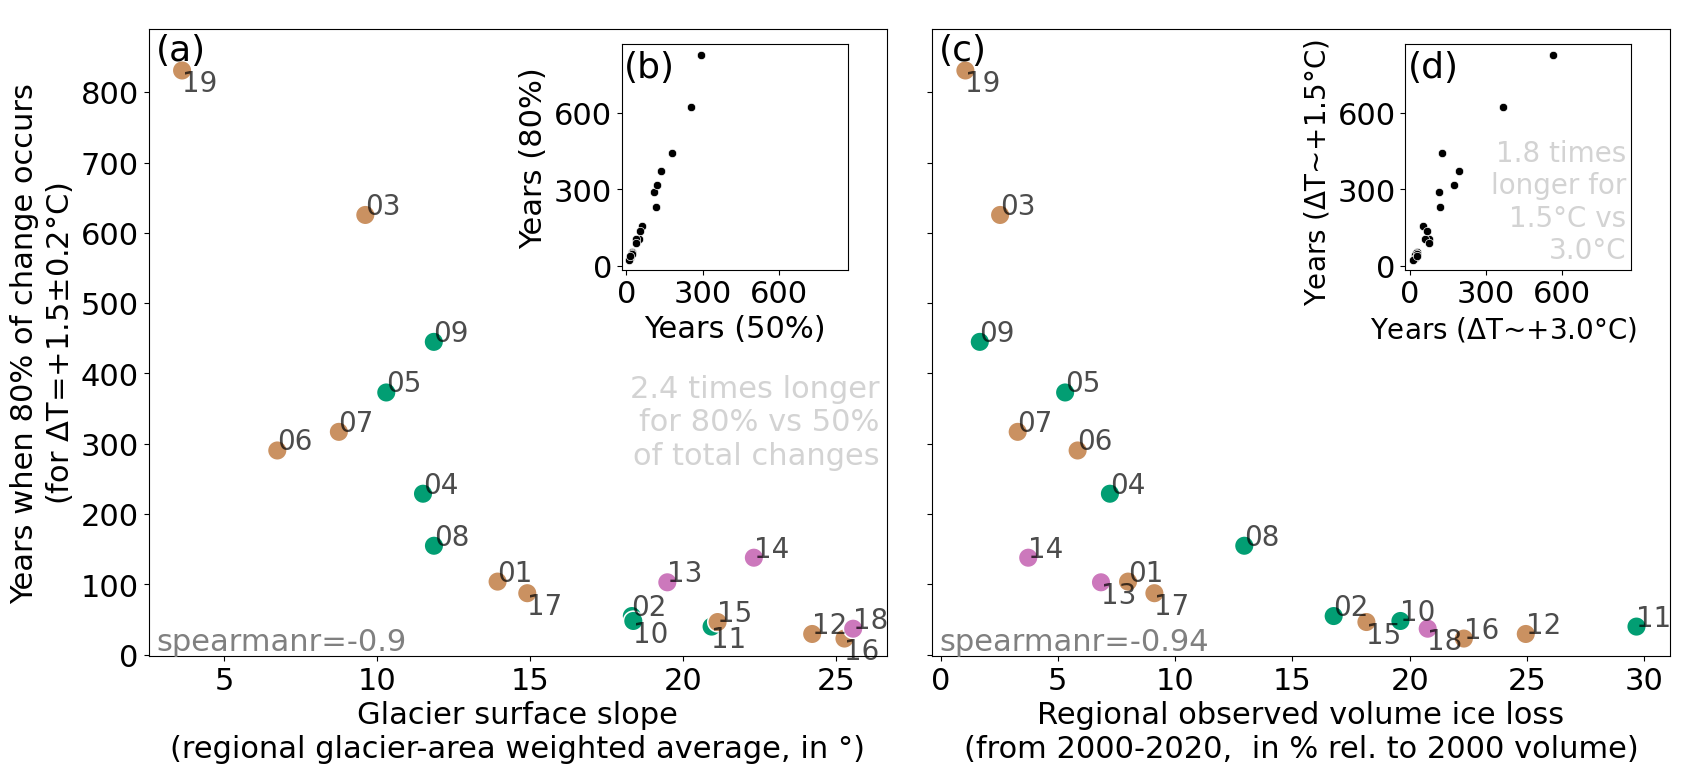

In [29]:
plt.figure(figsize=((26/3)*2,8))

num_text_x = 0.01
num_text_y = 0.95
r=1
c=2
ax=plt.subplot(r,c,1)
ax=plt.gca()
yy2='resp_time_-80%_1_5_deg'
ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-50%_1_5_deg'
xlabel2 = r'Years when 50% of change occurs ($\Delta$T=+1.5°C)'

xx=f'slope_weighted_area_avg' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['11','10','19','16','17']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['11','10','19','16','17']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)

ax.set_ylabel(ylabel)

ax.set_xlabel(f'Glacier surface slope\n(regional glacier-area weighted average, in °)')

inset_ax = inset_axes(ax,
                    width="37%", # width = 30% of parent_bbox
                    height="36%", # height : 1 inch
                    loc='upper right',
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                       )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(df,y=yy2,x=xx2,ax=inset_ax, color='black')
inset_ax.set_xlabel('Years (50%)')
inset_ax.set_ylabel('Years (80%)') 
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
inset_ax.text(num_text_x, num_text_y*0.9,
         num_dict[1], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96', fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))

ax.text(0.99,0.45, f"{np.nanmedian(df[yy2]/df[xx2]).round(1)} times longer\nfor 80% vs 50%\nof total changes", fontsize=22,
 transform=ax.transAxes, ha='right', va='top', color='lightgrey')
ax1=ax

##############################################
ax=plt.subplot(r,c,2)

yy2='resp_time_-80%_1_5_deg'
ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_3_0_deg'

xx=f'20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
#pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
#pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.drop(['19','17','18','15','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['19','17','18','15','13']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)

ax.set_ylabel(ylabel)

ax.set_xlabel(f'Regional observed volume ice loss\n(from 2000-2020,  in % rel. to 2000 volume)')

inset_ax = inset_axes(ax,
                    width="37%", # width = 30% of parent_bbox
                    height="36%", # height : 1 inch
                    loc='upper right',
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                       )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(df,y=yy2,x=xx2,ax=inset_ax, color='black')
inset_ax.set_xlabel(r'Years ($\Delta$T~+3.0°C)    ', fontsize=20)
inset_ax.set_ylabel(r'Years ($\Delta$T~+1.5°C)    ', fontsize=20) 
inset_ax.text(num_text_x, num_text_y*0.9,
         num_dict[3], fontsize=26, transform=inset_ax.transAxes)
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
#inset_ax.text(num_text_x, num_text_y*0.9,
#         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96',
#         fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))
inset_ax.text(0.98,0.58, f"{np.nanmedian(df[yy2]/df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=20,
 transform=inset_ax.transAxes, ha='right', va='top', color='lightgrey')
ax2=ax
num_text_x = 0.01
for j,axi in enumerate([ax1, ax2]):
    num_text_y = 0.95
    axi.text(num_text_x, num_text_y,
             num_dict[j*2], fontsize=26, transform=axi.transAxes)
    axi.set_ylim([-2,890])
    if j == 1:
        axi.set_ylabel('')
        axi.set_yticklabels([]) 
    #if j<3:
    #    axi.set_ylim(ax1.get_ylim())
plt.tight_layout()
plt.savefig(f'figures/fig4_{DATE}.png')

In [133]:
pd_lowess_ch.loc['01']

ice_loss_1.2°C_%_rel_2020                                           38.692842
ice_loss_2.7°C_%_rel_2020                                           69.519421
ice_loss_1.5°C_%_rel_2020                                           43.890451
ice_loss_2.0°C_%_rel_2020                                           59.534663
ice_loss_3.0°C_%_rel_2020                                             71.3124
ice_loss_slope_between_1.0_and_2.5_per_degC_rel_2020                22.464332
ice_loss_slope_between_1.1_and_2.6_per_degC_rel_2020                21.370067
ice_loss_slope_between_1.2_and_2.7_per_degC_rel_2020                20.551053
ice_loss_slope_between_1.3_and_2.8_per_degC_rel_2020                19.876012
ice_loss_slope_between_1.4_and_2.9_per_degC_rel_2020                19.269012
ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020                18.281299
ice_loss_slope_between_1.6_and_3.1_per_degC_rel_2020                 16.75233
ice_loss_slope_between_1.7_and_3.2_per_degC_rel_2020            

/tmp/ipykernel_3628154/366813275.py:141: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


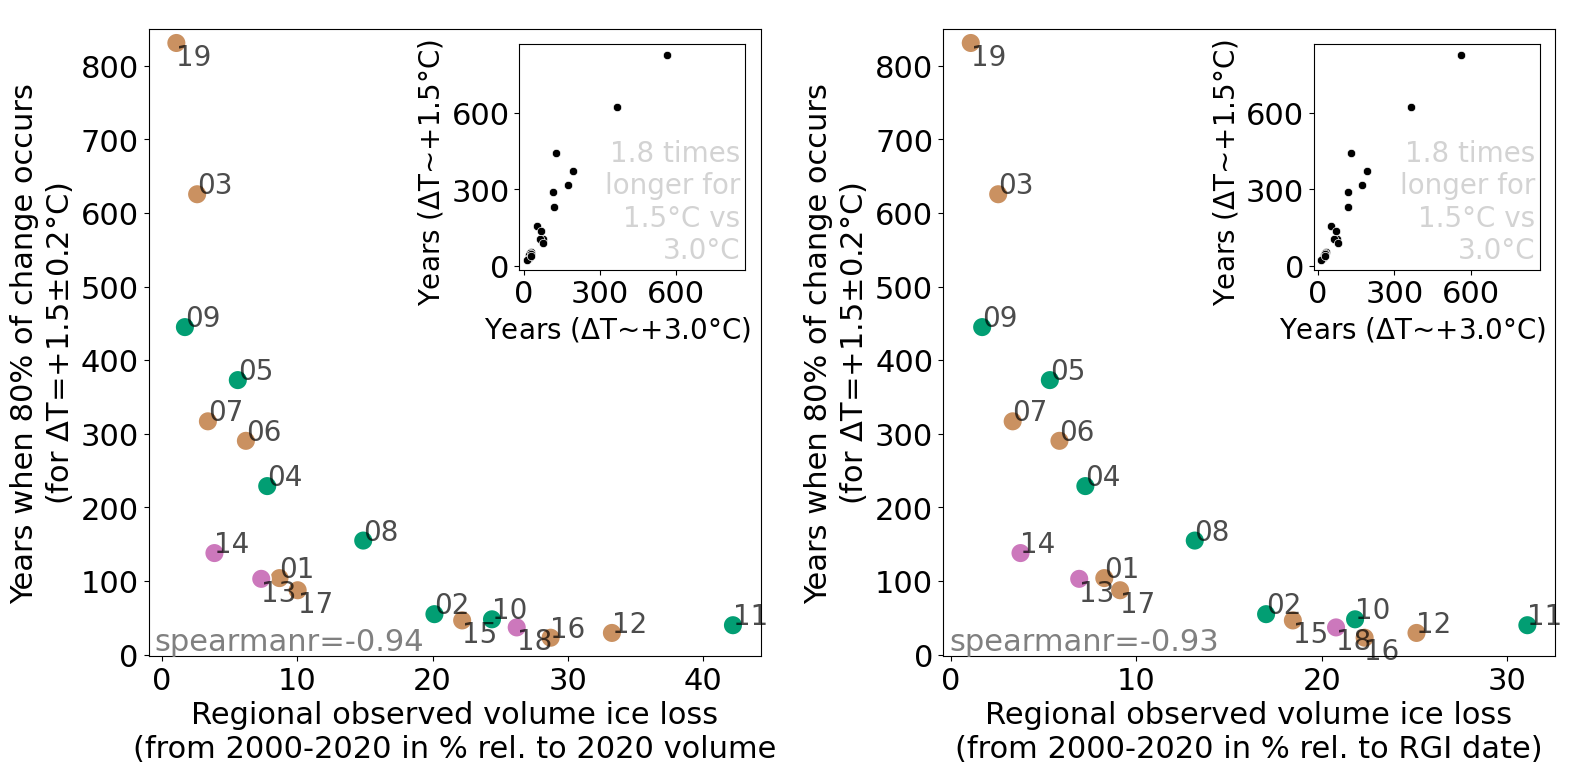

In [30]:
plt.figure(figsize=(32,8))
r=1
c=4
ax=plt.subplot(r,c,1)
num_text_x = 0.01
num_text_y = 0.95


yy2='resp_time_-80%_1_5_deg'
ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_3_0_deg'

xx=f'20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
#pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
#pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.drop(['19','17','18','15','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['19','17','18','15','13']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)

ax.set_ylabel(ylabel)

ax.set_xlabel(f'Regional observed volume ice loss\n(from 2000-2020 in % rel. to 2020 volume')


plt.ylim([-2,850])

inset_ax = inset_axes(ax,
                    width="37%", # width = 30% of parent_bbox
                    height="36%", # height : 1 inch
                    loc='upper right',
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                       )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(df,y=yy2,x=xx2,ax=inset_ax, color='black')
inset_ax.set_xlabel(r'Years ($\Delta$T~+3.0°C)    ', fontsize=20)
inset_ax.set_ylabel(r'Years ($\Delta$T~+1.5°C)    ', fontsize=20) 
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
#inset_ax.text(num_text_x, num_text_y*0.9,
#         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96',
#         fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))
inset_ax.text(0.98,0.58, f"{np.nanmedian(df[yy2]/df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=20,
 transform=inset_ax.transAxes, ha='right', va='top', color='lightgrey')
#############################
r=1
c=4
ax=plt.subplot(r,c,2)
num_text_x = 0.01
num_text_y = 0.95


yy2='resp_time_-80%_1_5_deg'
ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'
xx2 = f'resp_time_-80%_3_0_deg'

xx=f'20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%' #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
yy = 'resp_time_-80%_1_5_deg'
sns.scatterplot(data=pd_lowess_ch,
                y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                x=xx,
                hue=f'kmeans_cluster_{k}{rel_add}',
                palette=palette_cb[:k], s=200, legend = False)
print_spearman = True
corrcoef,pval = spearmanr(pd_lowess_ch[[xx,yy]].dropna()[xx].values, pd_lowess_ch[[xx,yy]].dropna()[yy].values)
corrcoef = corrcoef.round(2)
if (pval <0.05) and print_spearman:
    ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
            transform=ax.transAxes, color='grey', fontsize=22)
#pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
pd_lowess_ch.drop(['19','17','18','15','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
pd_lowess_ch.loc[['19','17','18','15','16','13']].apply(lambda x: plotlabel_bb(x[xx],x[yy], x.region, ax=ax), axis=1)

ax.set_ylabel(ylabel)

ax.set_xlabel(f'Regional observed volume ice loss\n(from 2000-2020 in % rel. to RGI date)')


plt.ylim([-2,850])

inset_ax = inset_axes(ax,
                    width="37%", # width = 30% of parent_bbox
                    height="36%", # height : 1 inch
                    loc='upper right',
                    #bbox_to_anchor=(1, 0.9, 0, 0),
                       )
#inset_ax.set_title(' t\n t', alpha =0)
sns.scatterplot(df,y=yy2,x=xx2,ax=inset_ax, color='black')
inset_ax.set_xlabel(r'Years ($\Delta$T~+3.0°C)    ', fontsize=20)
inset_ax.set_ylabel(r'Years ($\Delta$T~+1.5°C)    ', fontsize=20) 
#_plotlabel=plotlabel, _plotlabel_b=plotlabel_b)
#inset_ax.text(num_text_x, num_text_y*0.9,
#         num_dict[4], fontsize=26, transform=inset_ax.transAxes)

#plt.text(0.99, 0.99,
#         'R²=0.96',
#         fontsize=22, color='grey', va='top', ha='right',
#         transform=inset_ax.transAxes)
#plt.ylim([-2,840])
#inset_ax.grid(alpha=0.5)

inset_ax.set_aspect('equal')
ylim0,ylim1 = inset_ax.get_ylim()
xlim0,xlim1 = inset_ax.get_xlim()
lim0 = min(ylim0, xlim0)
lim1 = max(ylim1, xlim1)
inset_ax.set_xlim([lim0, lim1])
inset_ax.set_ylim([lim0, lim1])

inset_ax.set_xticks(np.arange(0,lim1,300))
inset_ax.set_yticks(np.arange(0,lim1,300))
inset_ax.text(0.98,0.58, f"{np.nanmedian(df[yy2]/df[xx2]).round(1)} times\nlonger for\n1.5°C vs\n3.0°C", fontsize=20,
 transform=inset_ax.transAxes, ha='right', va='top', color='lightgrey')
plt.tight_layout()

In [134]:
np.median([3,5])

4.0

### Additional correlation analysis

In [31]:
df.loc[df.region == pd_lowess_ch.index.values, 'ice_loss_1.2°C_%_rel_2020'] =  pd_lowess_ch['ice_loss_1.2°C_%_rel_2020'].values
df.loc[df.region == pd_lowess_ch.index.values, 'ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020'] =  pd_lowess_ch['ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020'].values
df.loc[df.region == pd_lowess_ch.index.values, 'kmeans_cluster_3_rel_2020'] = pd_lowess_ch['kmeans_cluster_3_rel_2020']

In [194]:
#'regional_volume_m3_itmix_vs_2020',
# 'regional_dvol_dt_2000_2019_vs_2020_vol',
       #'kmeans_cluster_3_rel_2020'
                    #'yr_diff_rgi_vs_2020', 
#'mean_len_ten_largest_glac',
        #'rgi_year_weighted_median',
       #  'elev_diff_to_med_area_weighted', don not use that because we don't have that for RGI19 !!!
#'lat_weighted_area_avg', 
#'geodetic_obs_area_weighted',
#'lat_weighted_area_avg', 
        #'slope_weighted_vol_avg',
#'temp_avg_1981-2000', 
#         'prcp_avg_1981-2000',
#'continentality_index_avg_1981-2000',
       # 'temp_avg_1995-2014',
#'prcp_avg_1995-2014',
        #'continentality_index_avg_1995-2014',
#'temp_ch_avg_1986-2005_vs_1901-1920',
#'temp_ch_avg_1995-2014_vs_1901-1920', 
columns_sel3_d = {
    #'rgi_reg': 'rgi_reg',
    #'region': 'region',
    ####### climate indices 
    'temp_ch_avg_2000-2019_vs_1901-1920': 'ΔTemp 2000-2019 - 1901-1920 (reg-aw)',
    'temp_avg_2000-2019': 'Temp 2000-2019 (reg-aw)',
    'prcp_avg_2000-2019': 'Prcp 2000-2019 (reg-aw)',
    'continentality_index_avg_2000-2019': 'Continentality index 2000-2019 (reg-aw)',
    #'median_reg_vs_glob_ch': '',
    #'median_reg_vs_glob_temp_ch_above_zero_eight_deg': ,
    #'median_reg_vs_glob_temp_ch_0.8_1.5': '',
    'median_reg_vs_glob_temp_ch_1.5_3.0': 'Ratio reg vs global ΔTemp (median, reg-aw)',
    'median_reg_vs_glob_temp_ch_1.5_3.0': 'Ratio reg vs global ΔTemp (1.5-3.0°C, median, reg-aw)',
    #'slope_fit_reg_vs_glob_ch': 'Fitted slope regional vs global temp change (aw)',
    
    ##### glacier topography ... 
    'slope_weighted_area_avg': 'Glacier surface slope (reg-aw)',
    'lat_absolute_weighted_area_avg': 'Latitude (absolute, reg-aw)',
    'mean_vol_ten_largest_glac': 'Mean volume (10 largest)',
    'mean_area_ten_largest_glac': 'Mean area (10 largest)',
    'elev_diff_area_weighted': 'Elevation difference (reg-aw)',
    'max_elev_area_weighted': 'Maximum elevation (reg-aw)',
    'min_elev_area_weighted': 'Minimum elevation (reg-aw)',
    'ice_cap_ratio_hundredlargest_glac': 'Ratio ice caps (100 largest)',
    'marine_term_ratio_hundredlargest_glac': 'Ratio marine-terminating (100 largest)',
    #'regional_volume_m3_itmix': 'Reg volume (inventory date)',
    f'regional_volume_m3_2020{approach}': 'Reg volume (2020)',

    # glacier changes in the past
    'dvoldt_m3_hugonnet': '20-year reg ΔVolΔt 2000-2019 (Hugonnet, 2021)',
    '20yr_regional_dvol_dt_2000_2019_vs_2000_vol_%': '20-year reg ΔVolΔt 2000-2019 rel. to 2000 Vol',
    #'20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%': '20-year reg dVoldt 2000-2019 rel. to Volume inventory date',
    
    # glacier simulation changes from GMIP3 
    'resp_time_-50%_1_5_deg': 'Time to reach 50% of changes (~1.5°C, reg)',
    'resp_time_-50%_3_0_deg': 'Time to reach 50% of changes (~3.0°C, reg)',
    'resp_time_-80%_1_5_deg': 'Time to reach 80% of changes (~1.5°C, reg)',
    'resp_time_-80%_3_0_deg': 'Time to reach 80% of changes (~3.0°C, reg)',
    'ice_loss_1.2°C_%_rel_2020': 'Committed ice loss (1.2°C, reg, %, rel. 2020)',
    'ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020': 'Ice loss temp sensitivity (1.5-3.0°C, reg, rel. 2020)'
}
columns_sel3 = columns_sel3_d.keys()

- (10/100 largest) : 10/100 glaciers with the largest initial ice volume according to Farinotti et al. (2019) at inventory date
- (aw) : glacier-area weighted
- (reg) : regional 
- (avg) : averaged

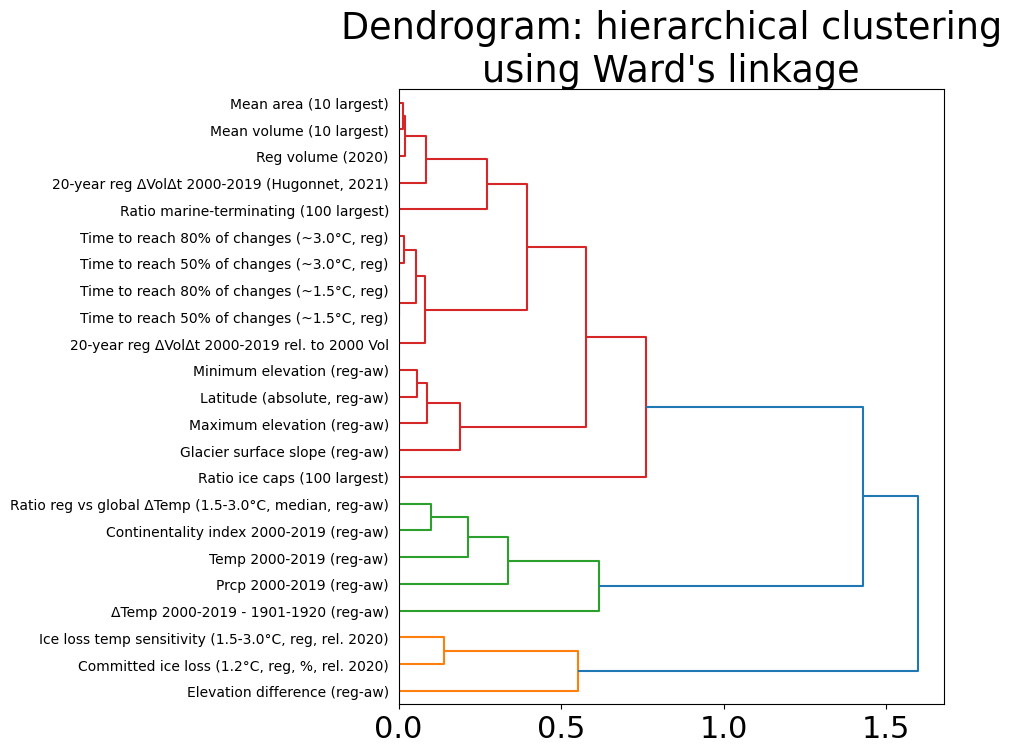

In [195]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
X = df.iloc[1:].reset_index(drop=True)[columns_sel3]
assert list(X.columns) == list(columns_sel3)
X.columns = columns_sel3_d.values()

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 8))
corr = spearmanr(X).correlation
# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=X.columns.to_list(), ax=ax1, leaf_rotation=0,
    orientation='right'
)
dendro_idx = np.arange(0, len(dendro["ivl"]))
plt.title("Dendrogram: hierarchical clustering\nusing Ward's linkage")
#ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
#ax2.set_xticks(dendro_idx)
#ax2.set_yticks(dendro_idx)
#ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
#ax2.set_yticklabels(dendro["ivl"])
_ = fig.tight_layout()
#labels_y = plt.gca().get_yticklabels()
#plt.gca().set_yticklabels(list(columns_sel3_d.values()));

array([0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225,
       0.25 ])

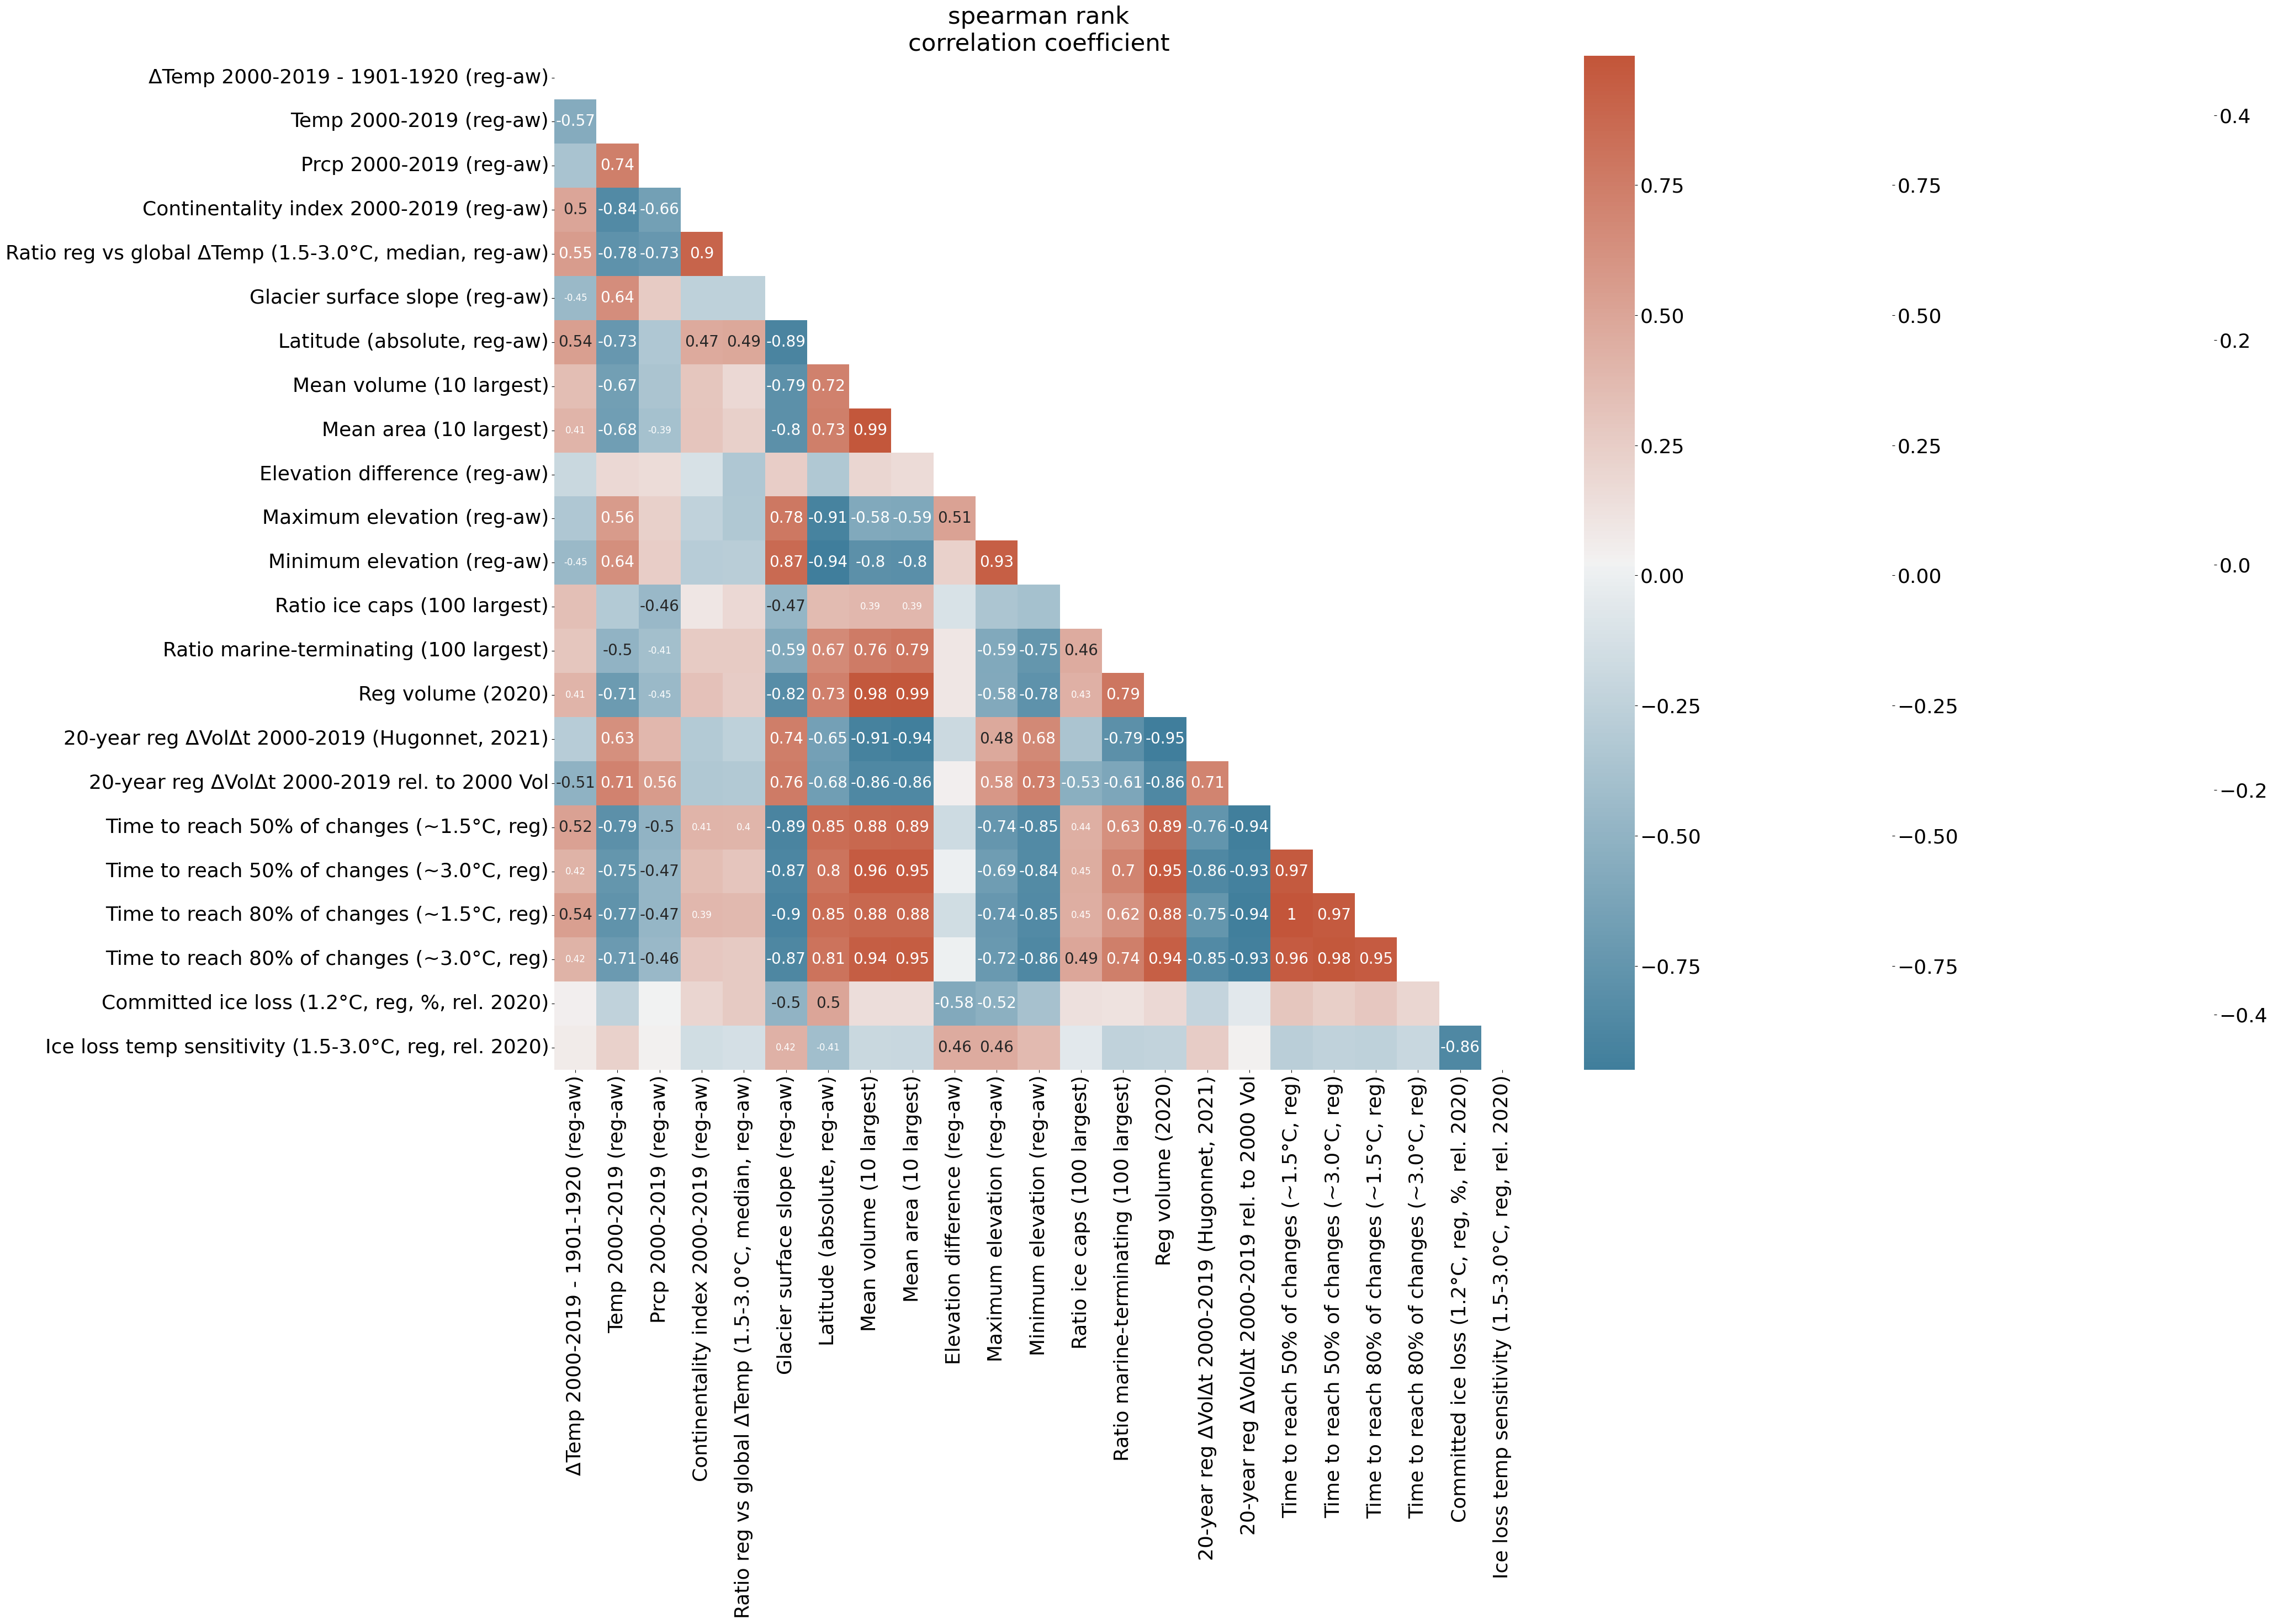

In [238]:
#Correlation between different variables
#
plt.rc('font', size=26)  

df_sel = df.loc[df.rgi_reg !='All'].reset_index(drop=True)[columns_sel3].copy()

assert list(df_sel.columns) == list(columns_sel3)
# ok, let's rename it to nice names
df_sel.columns = columns_sel3_d.values()

corr = df_sel.corr(method='spearman') # df_sel.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(45, 30))
#
plt.title('spearman rank\ncorrelation coefficient')
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
# Create an empty matrix to store p-values
num_cols = len(df_sel.columns)
p_values = np.zeros((num_cols, num_cols))

# Calculate p-values for each pair of columns
for i, col1 in enumerate(df_sel.columns):
    for j, col2 in enumerate(df_sel.columns):
        a, p_value = spearmanr(df_sel[col1], df_sel[col2])
        p_values[i][j] = p_value

# Convert the matrix to a DataFrame for better visualization
p_values_df = pd.DataFrame(p_values, columns=df_sel.columns, index=df_sel.columns)

sns.heatmap(corr[(p_values_df<0.1)&(p_values_df>=0.05)],annot=True, mask = mask, cmap=cmap, annot_kws={'fontsize':12}, alpha =0)


# Assume colorbar was plotted last one plotted last
sns.heatmap(corr[p_values_df<0.05],annot=True, mask = mask, cmap=cmap, annot_kws={'fontsize':20}, alpha =0)
sns.heatmap(corr, annot=False, mask = mask, cmap=cmap)
# Get the images on an axis
#ax = plt.gca()
#im =  # Display the image data
#cbar = fig.colorbar(ax.imshow(data)    )  # Add a colorbar to the figure based on the image
#cbar.set_ticklabels(cbar.get_ticks(), fontsize=32)
#cb = im[-1].colorbar   
#ax.set_yticklabels(fontsize=24)
#ax.set_xticklabels(fontsize=24)

plt.tight_layout()
plt.savefig('figures/fig_corr_matrix.pdf')

In [197]:
df[f'regional_volume_km3_2020{approach}'] = df[f'regional_volume_m3_2020{approach}']/1e9

In [37]:
cols_sel_rt = ['temp_avg_2000-2019', f'regional_volume_km3_2020{approach}', 'lat_absolute_weighted_area_avg']
cols_sel_labels = ['Temperature (°C, avg. 2000-2019,\nnear-glacier, glacier-area weighted)', 'Regional glacier volume (km³)', 'Latitude in absolute values\n(glacier-area-weighted']

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


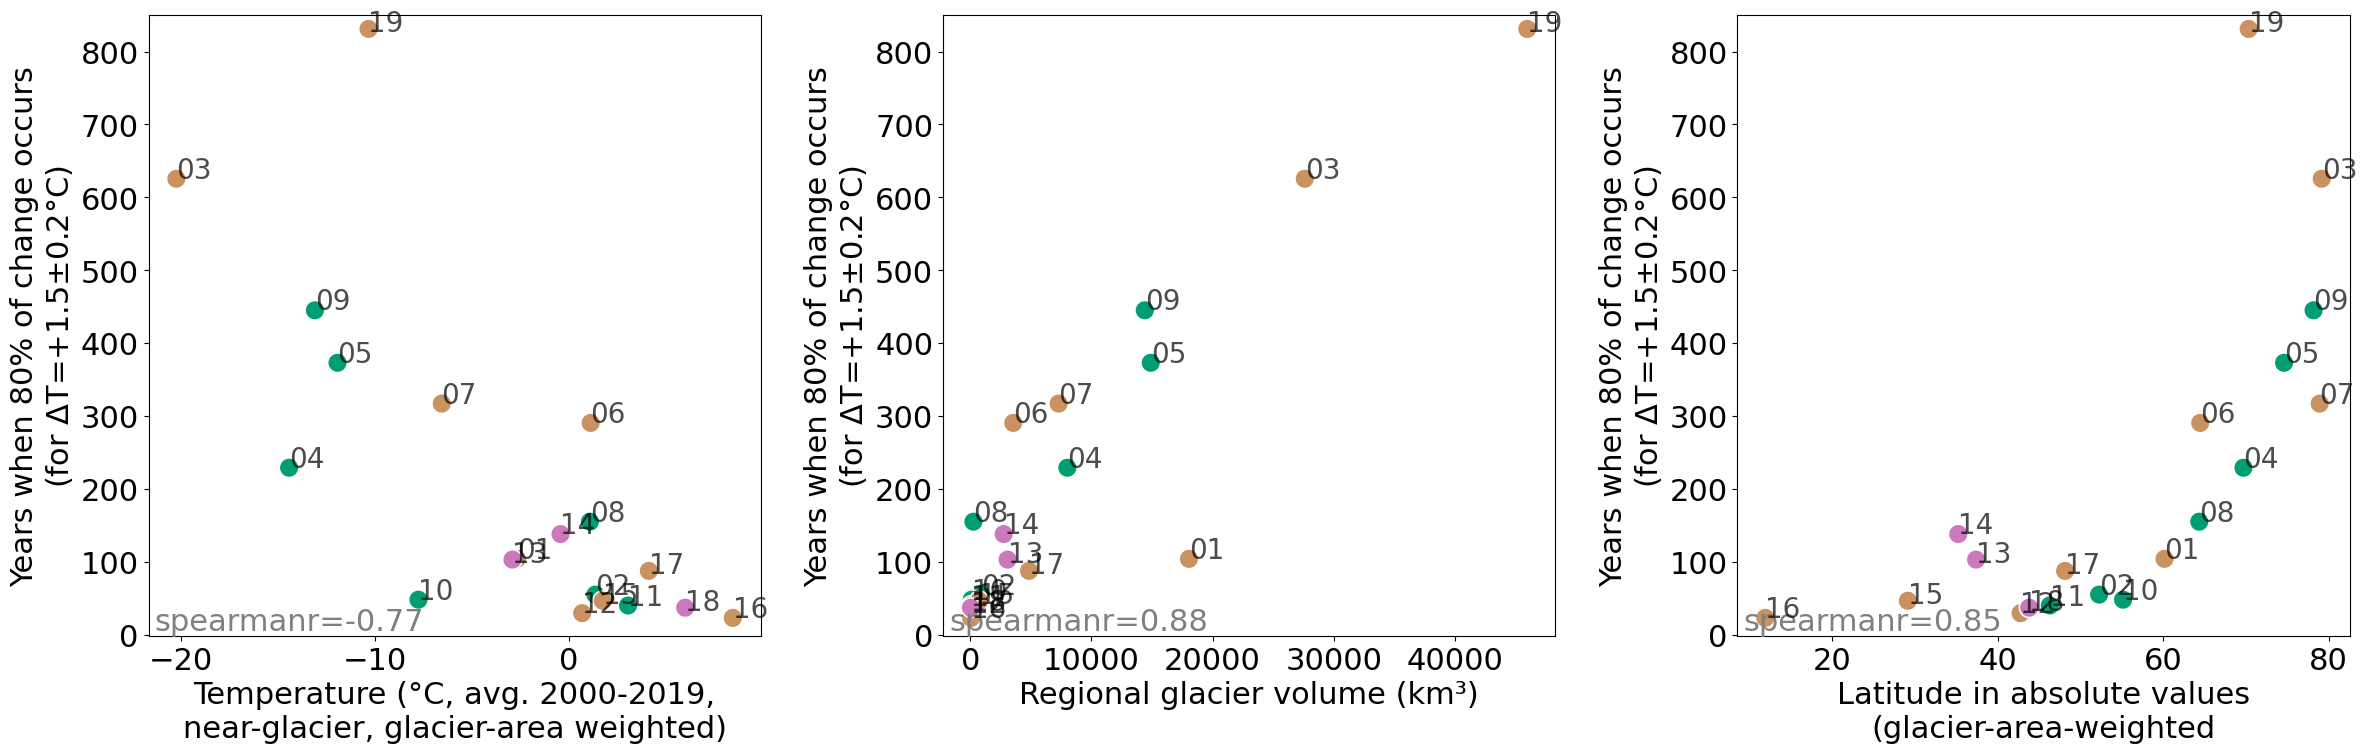

In [72]:
plt.figure(figsize=(32,8))
r=1
c=4

j=0
for col_sel,lab in zip(cols_sel_rt,cols_sel_labels):

    ax=plt.subplot(r,c,1+j)
    num_text_x = 0.01
    num_text_y = 0.95

    ylabel = f'Years when 80% of change occurs\n'+r'(for $\Delta$T=+1.5$\pm$0.2°C)'


    xx=col_sel #'elev_diff_to_med_area_weighted' #'elev_diff_to_med_area_weighted' #
    yy = 'resp_time_-80%_1_5_deg'
    sns.scatterplot(data=df,
                    y= yy, #f'ice_loss_slope_between_{np.round(temp0,1)}_and_{np.round(temp1,1)}_per_degC',
                    x=xx,
                    hue=f'kmeans_cluster_{k}{rel_add}',
                    palette=palette_cb[:k], s=200, legend = False)
    print_spearman = True
    corrcoef,pval = spearmanr(df[[xx,yy]].dropna()[xx].values, df[[xx,yy]].dropna()[yy].values)
    corrcoef = corrcoef.round(2)
    if (pval <0.05) and print_spearman:
        ax.text(0.01,0.01, f'spearmanr={corrcoef}', ha='left',
                transform=ax.transAxes, color='grey', fontsize=22)
    #pd_lowess_ch.apply(lambda x: _plotlabel(x[xx],x[yy], x.index, ax=ax), axis=1)
    #pd_lowess_ch.drop(['05','04','11','07','16','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
    #pd_lowess_ch.loc[['05','04','11','07','16','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)
    df.drop(['19','17','18','15','13']).apply(lambda x: plotlabel(x[xx],x[yy], x.region, ax=ax), axis=1)
    df.loc[['19','17','18','15','13']].apply(lambda x: plotlabel_b(x[xx],x[yy], x.region, ax=ax), axis=1)

    ax.set_ylabel(ylabel)
    ax.set_xlabel(lab)

    plt.ylim([-2,850])
    j+=1
plt.tight_layout()

In [73]:
columns_sel_rt =  ['temp_ch_avg_2000-2019_vs_1901-1920',
 'temp_avg_2000-2019',
 'prcp_avg_2000-2019',
 'continentality_index_avg_2000-2019',
 'median_reg_vs_glob_ch',
 'median_reg_vs_glob_temp_ch_above_zero_eight_deg',
 'slope_fit_reg_vs_glob_ch',
 'slope_weighted_area_avg',
 'lat_absolute_weighted_area_avg',
 'marine_term_ratio_hundredlargest_glac',
 'mean_vol_ten_largest_glac',
 'elev_diff_area_weighted',
 #'elev_diff_to_med_area_weighted',
 'ice_cap_ratio_hundredlargest_glac',
 'max_elev_area_weighted',
 'min_elev_area_weighted',
 'mean_area_ten_largest_glac',
 #'mean_len_ten_largest_glac',
 'regional_volume_m3_itmix',
 'dvoldt_m3_hugonnet',
       f'regional_volume_m3_2020{approach}',
 '20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%',
 '20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%',
 'ice_loss_1.2°C_%_rel_2020',
 'ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020',
                          'median_reg_vs_glob_temp_ch_0.8_1.5',
       'median_reg_vs_glob_temp_ch_1.5_3.0']

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


### Stuff for the multilinear fit ... 
# assume linear relationship, but could add np.log, 1/x and 1/x+1 relationships (this would definitely increase the R2...)
from statsmodels.formula.api import ols

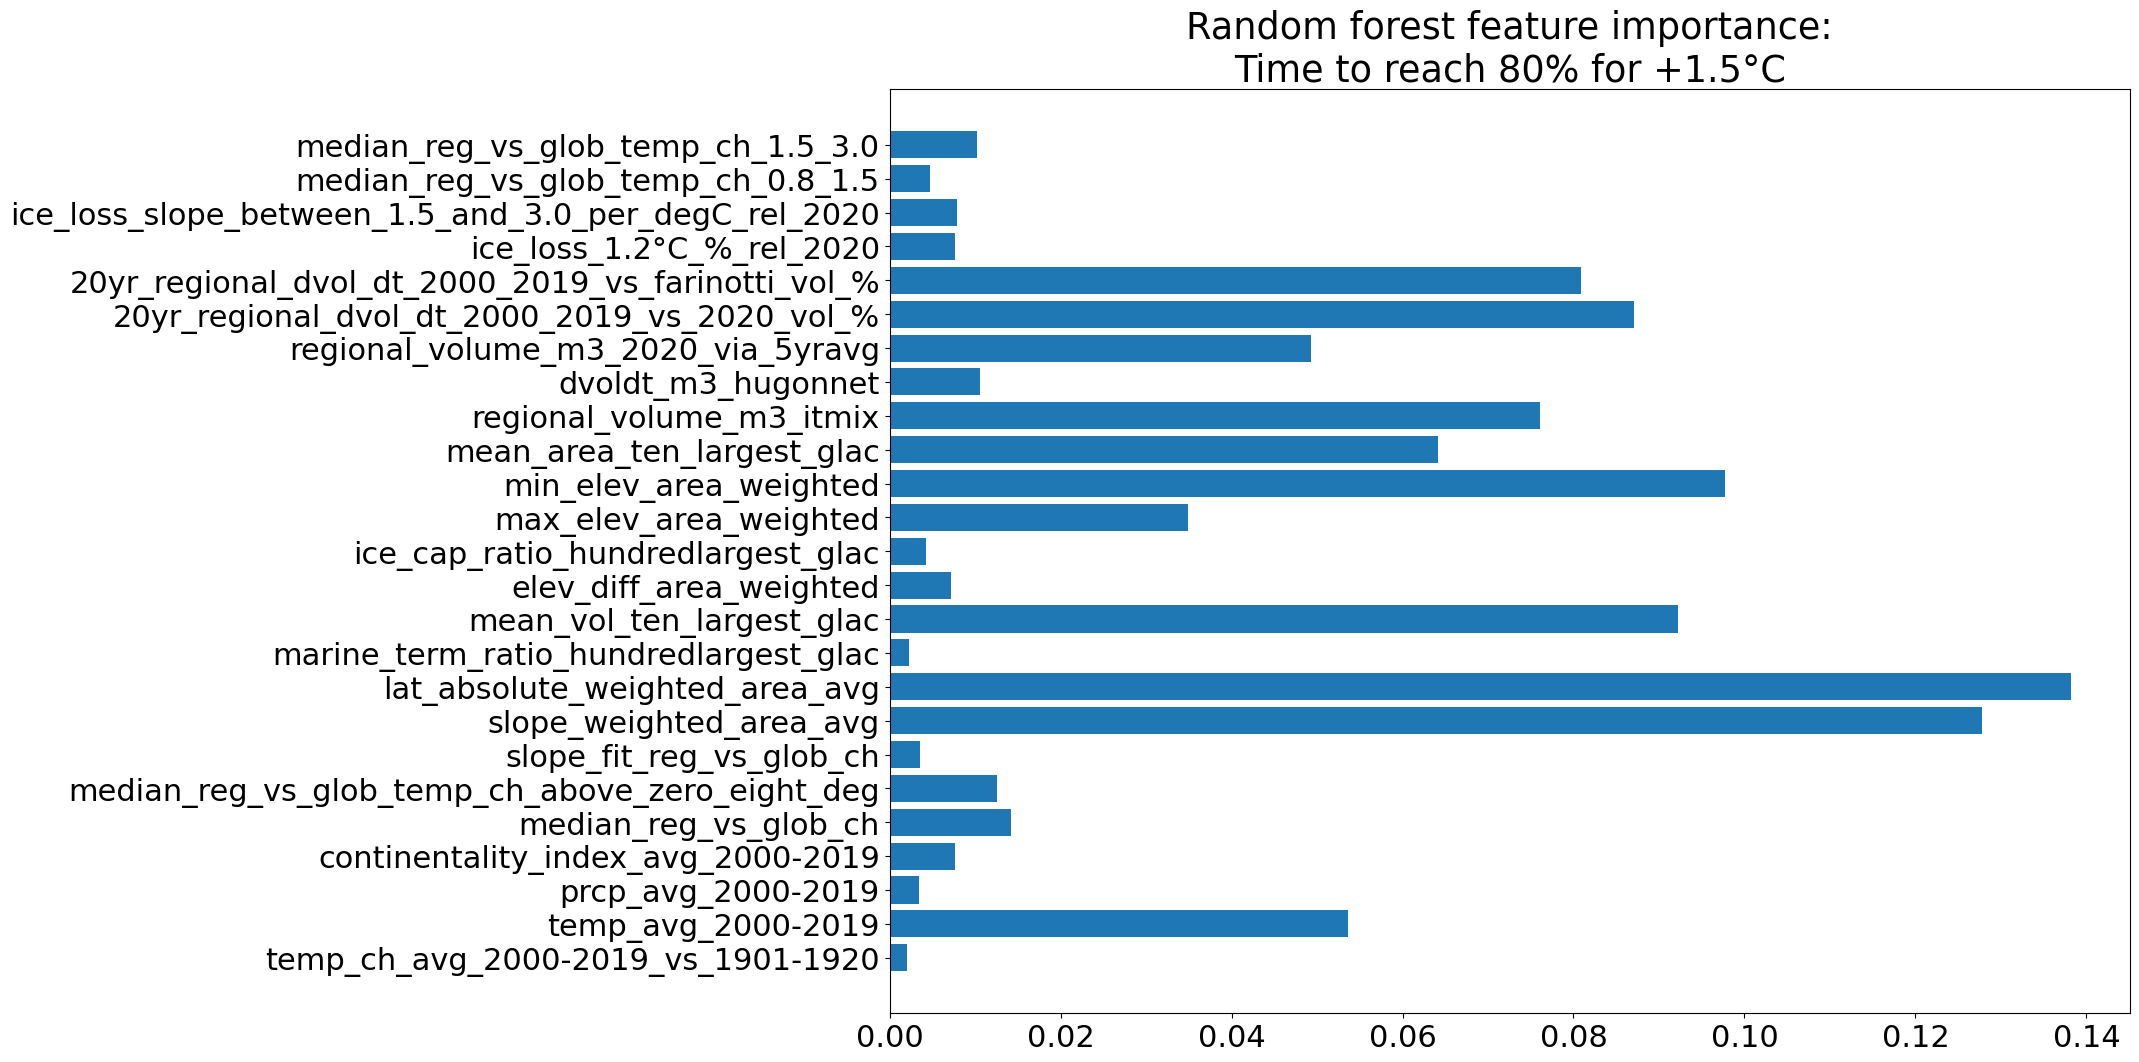

In [76]:
plt.figure(figsize=(16,12))

X = df.iloc[1:].reset_index(drop=True)[columns_sel_rt]
y = df.iloc[1:].reset_index(drop=True)['resp_time_-80%_1_5_deg']
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)

# get importance
importance = clf.feature_importances_
# summarize feature importance
#for i,v in zip(X.columns, importance):
#    print(f'Feature: {i}, Score: {v:.5f}')
# plot feature importance
plt.title('Random forest feature importance:\nTime to reach 80% for +1.5°C')
plt.barh(X.columns,importance)
plt.show()

In [77]:
columns_sel =  ['temp_ch_avg_2000-2019_vs_1901-1920',
 'temp_avg_2000-2019',
 'prcp_avg_2000-2019',
 'continentality_index_avg_2000-2019',
 'median_reg_vs_glob_ch',
 'median_reg_vs_glob_temp_ch_above_zero_eight_deg',
                        'median_reg_vs_glob_temp_ch_0.8_1.5',
       'median_reg_vs_glob_temp_ch_1.5_3.0',
 'slope_fit_reg_vs_glob_ch',
 'slope_weighted_area_avg',
 'lat_absolute_weighted_area_avg',
 'marine_term_ratio_hundredlargest_glac',
 'mean_vol_ten_largest_glac',
 'elev_diff_area_weighted',
 #'elev_diff_to_med_area_weighted',
 'ice_cap_ratio_hundredlargest_glac',
 'max_elev_area_weighted',
 'min_elev_area_weighted',
 'mean_area_ten_largest_glac',
 #'mean_len_ten_largest_glac',
 'regional_volume_m3_itmix',
 'dvoldt_m3_hugonnet',
                       f'regional_volume_m3_2020{approach}',
 '20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%',
 '20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%',
                    'resp_time_-50%_1_5_deg',
 'resp_time_-50%_3_0_deg',
 'resp_time_-80%_1_5_deg',
 'resp_time_-80%_3_0_deg',
                   
                   
 #'ice_loss_1.2°C_%_rel_2020',
 #'ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020'
                         ]

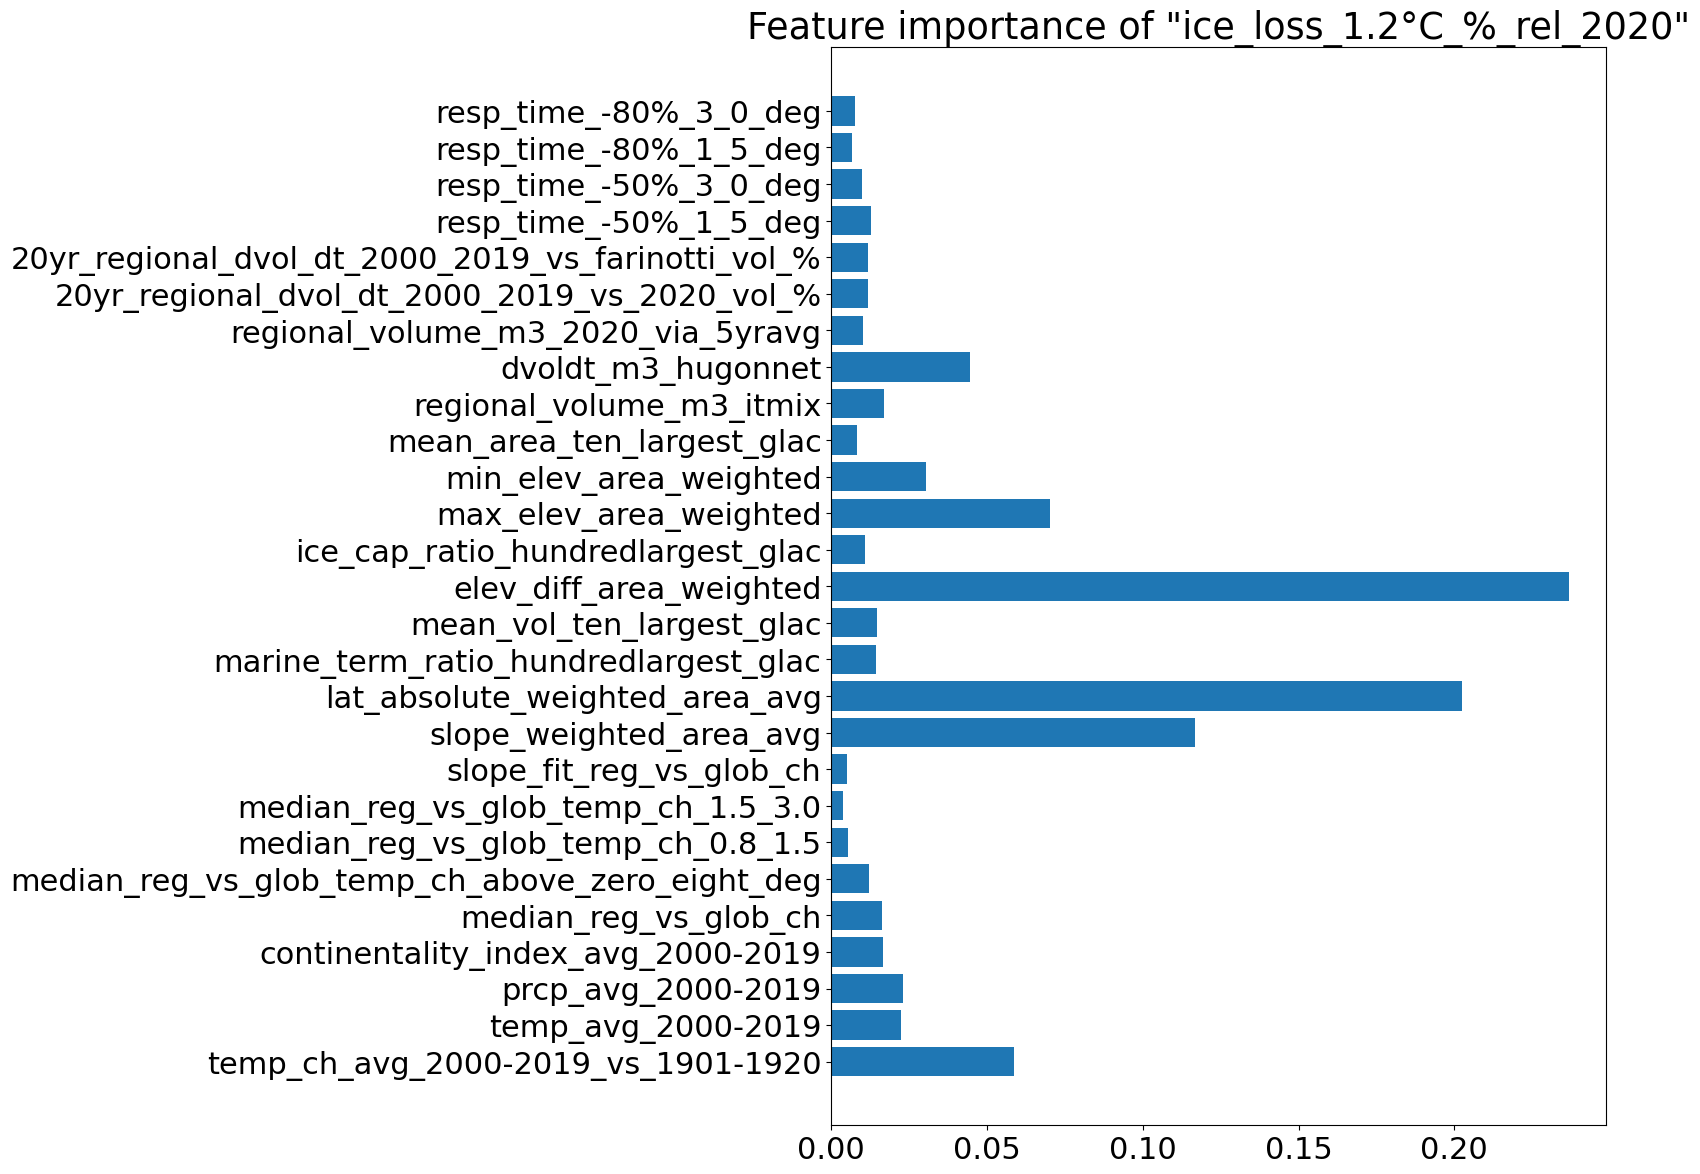

In [78]:
plt.figure(figsize=(10,14))
X = df.iloc[1:].reset_index(drop=True)[columns_sel]
y = df.iloc[1:].reset_index(drop=True)['ice_loss_1.2°C_%_rel_2020']
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)

# get importance
importance = clf.feature_importances_
# summarize feature importance
#for i,v in zip(X.columns, importance):
#    print(f'Feature: {i}, Score: {v:.5f}')
# plot feature importance
plt.barh(X.columns,importance)
plt.title('Feature importance of "ice_loss_1.2°C_%_rel_2020"')
plt.show()



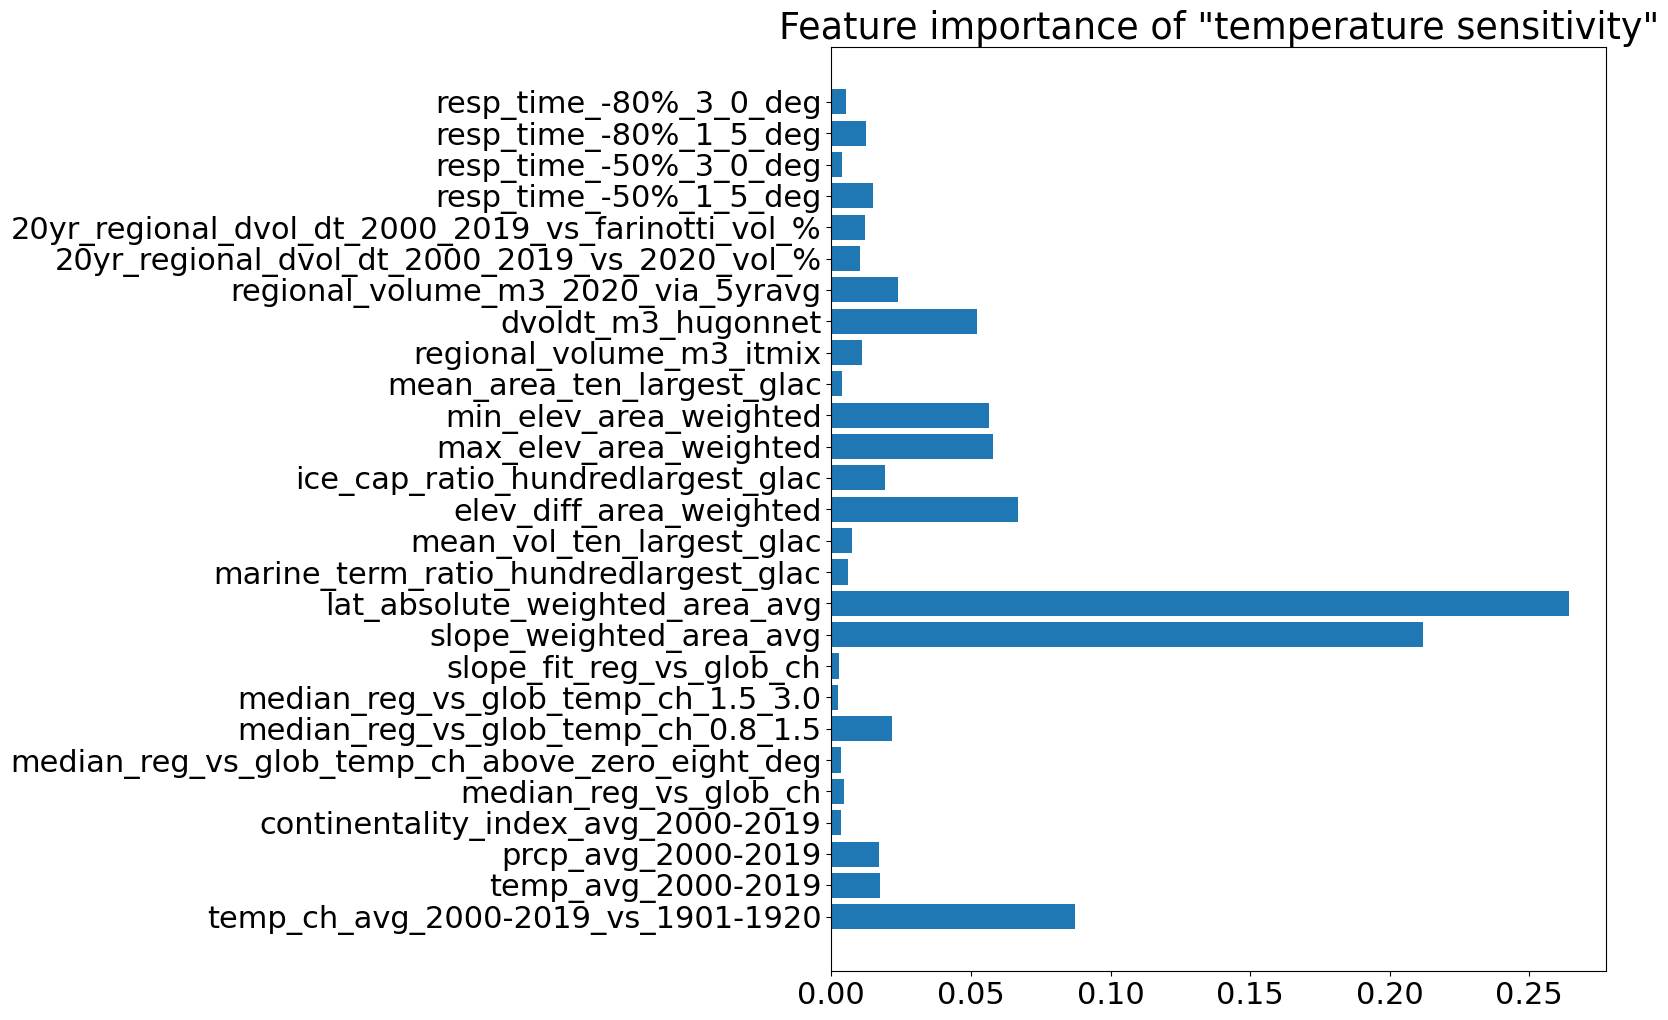

In [79]:
plt.figure(figsize=(10,12))
X = df.iloc[1:].reset_index(drop=True)[columns_sel]
y = df.iloc[1:].reset_index(drop=True)['ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020']
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)

# get importance
importance = clf.feature_importances_
# summarize feature importance
#for i,v in zip(X.columns, importance):
#    print(f'Feature: {i}, Score: {v:.5f}')
# plot feature importance
plt.barh(X.columns,importance)
plt.title('Feature importance of "temperature sensitivity"')
plt.show()



**now repeat the multilinear regression, but I am unsure if that makes sense ...**

In [113]:
df['resp_time_three_deg'] = df['resp_time_-50%_3_0_deg']
df['resp_time_one_o_five_deg'] = df['resp_time_-50%_1_5_deg']

df['resp_time_three_deg_80'] = df['resp_time_-80%_3_0_deg']
df['resp_time_one_o_five_deg_80'] = df['resp_time_-80%_1_5_deg']
df['temp_ch_avg_past'] = df['temp_ch_avg_2000-2019_vs_1901-1920'] #'temp_ch_avg_1986-2005_vs_1901-1920'
df['resp_time_three_deg'] = df['resp_time_-50%_3_0_deg']
df['resp_time_one_o_five_deg'] = df['resp_time_-50%_1_5_deg']
df['temp_avg_past'] = df['temp_avg_2000-2019']
df['prcp_avg_past'] = df['prcp_avg_2000-2019']
df['ci_avg_past'] = df['continentality_index_avg_2000-2019']
df['hugonnet_twenty_years_regional_dvol_dt_rel_now'] = df['20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%']
df['hugonnet_twenty_years_regional_dvol_dt_rel_farinotti'] = df['20yr_regional_dvol_dt_2000_2019_vs_farinotti_vol_%']
df['median_reg_vs_glob_temp_ch_around_one_o_2'] = df['median_reg_vs_glob_temp_ch_1.5_3.0']
df['median_reg_vs_glob_temp_ch_one_ofive_three'] = df['median_reg_vs_glob_temp_ch_1.5_3.0']
fs_linear_fit = [#'median_reg_vs_glob_ch',#'median_reg_vs_glob_temp_ch_above_zero_eight_deg',
                 'median_reg_vs_glob_temp_ch_around_one_o_2',
                 'median_reg_vs_glob_temp_ch_one_ofive_three',
       'slope_fit_reg_vs_glob_ch', 
      'slope_weighted_vol_avg','hugonnet_twenty_years_regional_dvol_dt_rel_now',
                 'hugonnet_twenty_years_regional_dvol_dt_rel_farinotti',
                        'median_reg_vs_glob_temp_ch_above_zero_eight_deg',
       'slope_weighted_area_avg', 'lat_weighted_area_avg',
       'lat_absolute_weighted_area_avg', 'temp_ch_avg_past','temp_avg_past','prcp_avg_past','ci_avg_past',
       'resp_time_three_deg','resp_time_one_o_five_deg','resp_time_one_o_five_deg','resp_time_three_deg_80',
      'marine_term_ratio_hundredlargest_glac', 'geodetic_obs_area_weighted', 'mean_vol_ten_largest_glac','elev_diff_area_weighted',
                 'elev_diff_area_weighted',
                 'ice_cap_ratio_hundredlargest_glac',
                        'max_elev_area_weighted','min_elev_area_weighted','elev_diff_to_med_area_weighted','mean_area_ten_largest_glac'] #,'mean_len_ten_largest_glac']

In [114]:
df['commit'] = df['ice_loss_1.2°C_%_rel_2020']
df['sensitivity'] = df['ice_loss_slope_between_1.5_and_3.0_per_degC_rel_2020']

fs_linear_fit_rt = ['commit', 'sensitivity',#'median_reg_vs_glob_ch',#'median_reg_vs_glob_temp_ch_above_zero_eight_deg',
                                     'median_reg_vs_glob_temp_ch_around_one_o_2',
                 'median_reg_vs_glob_temp_ch_one_ofive_three',
       'slope_fit_reg_vs_glob_ch', 
      'slope_weighted_vol_avg','hugonnet_twenty_years_regional_dvol_dt_rel_now',
                 'hugonnet_twenty_years_regional_dvol_dt_rel_farinotti',
                        'median_reg_vs_glob_temp_ch_above_zero_eight_deg',
       'slope_weighted_area_avg', 'lat_weighted_area_avg',
       'lat_absolute_weighted_area_avg', 'temp_ch_avg_past','temp_avg_past','prcp_avg_past','ci_avg_past',
       #'resp_time_three_deg','resp_time_one_o_five_deg','resp_time_one_o_five_deg','resp_time_three_deg_80',
      'marine_term_ratio_hundredlargest_glac', 'geodetic_obs_area_weighted', 'mean_vol_ten_largest_glac','elev_diff_area_weighted',
                 'elev_diff_area_weighted',
                 'ice_cap_ratio_hundredlargest_glac',
                        'max_elev_area_weighted','min_elev_area_weighted','elev_diff_to_med_area_weighted','mean_area_ten_largest_glac'
                   ] #,'mean_len_ten_largest_glac']

In [115]:
def log(x):
    return np.log(x)
def hyperb(x):
    return 1/x
def hyperb_plus(x):
    return 1/(x+1)
def linear(x):
    return x
def quadratic(x):
    return x**2

features_bic_d_a_simple={}
features_bic_d_b_simple = {}
features_r2_d_b_simple = {}
features_r2_d_a_simple = {}
features_r2_adj_d_a_simple = {}
features_r2_adj_d_b_simple = {}
fs = fs_linear_fit
for f in fs:
    for ff in fs:
        for fff in fs:
            features = f"{f}+{ff}+{fff}"
            #func=linear
            #for func in ['linear','hyperb','hyperb_plus','quadratic','log']:
            # here we only assume linearities, but actually it could also be 
            prestige_model_a = ols(f"commit ~{features}",
                                     data=df.iloc[1:]).fit()
            prestige_model_b = ols(f"sensitivity ~{features}",
                                 data=df.iloc[1:]).fit()
            features_bic_d_a_simple[features] = prestige_model_a.bic
            features_bic_d_b_simple[features] = prestige_model_b.bic
            features_r2_d_a_simple[features] = prestige_model_a.rsquared
            features_r2_d_b_simple[features] = prestige_model_b.rsquared
            features_r2_adj_d_a_simple[features] = prestige_model_a.rsquared_adj
            features_r2_adj_d_b_simple[features] = prestige_model_b.rsquared_adj

pd_a = pd.DataFrame(features_bic_d_a_simple, index=['BIC']).T.sort_values(by='BIC')[::6]
pd_a['R2'] = pd.DataFrame(features_r2_d_a_simple, index=['R2']).T.loc[pd_a.index]
pd_a['R2_adj'] = pd.DataFrame(features_r2_adj_d_a_simple, index=['R2_adj']).T.loc[pd_a.index]
pd_a.iloc[:5]

BIC        R2  \
resp_time_three_deg_80+elev_diff_to_med_area_we...  150.519972  0.697083   
elev_diff_to_med_area_weighted+geodetic_obs_are...  150.524128  0.697013   
elev_diff_to_med_area_weighted+median_reg_vs_gl...  151.063564  0.687796   
geodetic_obs_area_weighted+median_reg_vs_glob_t...  151.063564  0.687796   
slope_weighted_area_avg+resp_time_three_deg_80+...  151.475557  0.680567   

                                                      R2_adj  
resp_time_three_deg_80+elev_diff_to_med_area_we...  0.632172  
elev_diff_to_med_area_weighted+geodetic_obs_are...  0.632087  
elev_diff_to_med_area_weighted+median_reg_vs_gl...  0.620895  
geodetic_obs_area_weighted+median_reg_vs_glob_t...  0.620895  
slope_weighted_area_avg+resp_time_three_deg_80+...  0.612117

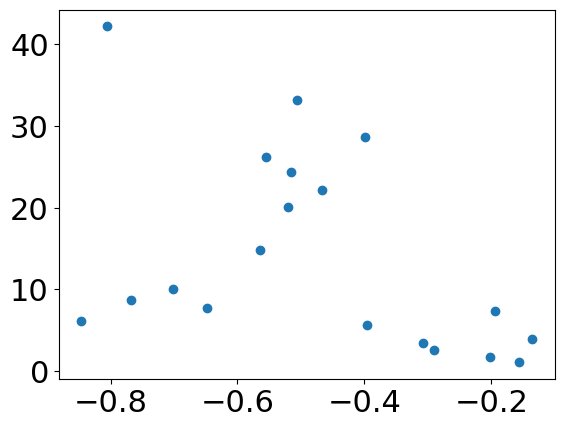

In [116]:
plt.plot(df.geodetic_obs_area_weighted, df['20yr_regional_dvol_dt_2000_2019_vs_2020_vol_%'], 'o')

In [117]:
best_features_a = pd.DataFrame(features_bic_d_a_simple, index=['BIC']).T.idxmin().values[0]
prestige_model_a = ols(f"commit ~ {best_features_a}",
                                 data=df.iloc[1:]).fit()
prestige_model_a.summary()

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 commit   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     10.74
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           0.000630
Time:                        15:35:12   Log-Likelihood:                -69.479
No. Observations:                  18   AIC:                             147.0
Df Residuals:                      14   BIC:                             150.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        119.6813     14.092      8.493      0.000      89.458     149.905
slope_weighted_vol_avg            -3.1304      0.703     -4.453      0.001      -4.638      -1.623
resp_time_three_deg_80            -0.1275      0.047     -2.718      0.017      -0.228      -0.027
elev_diff_to_med_area_weighted    -0.0277      0.009     -2.946      0.011      -0.048      -0.008
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.469
Skew:                          -0.062   Prob(JB):                        0.791
Kurtosis:                       2.219   Cond. No.                     3.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

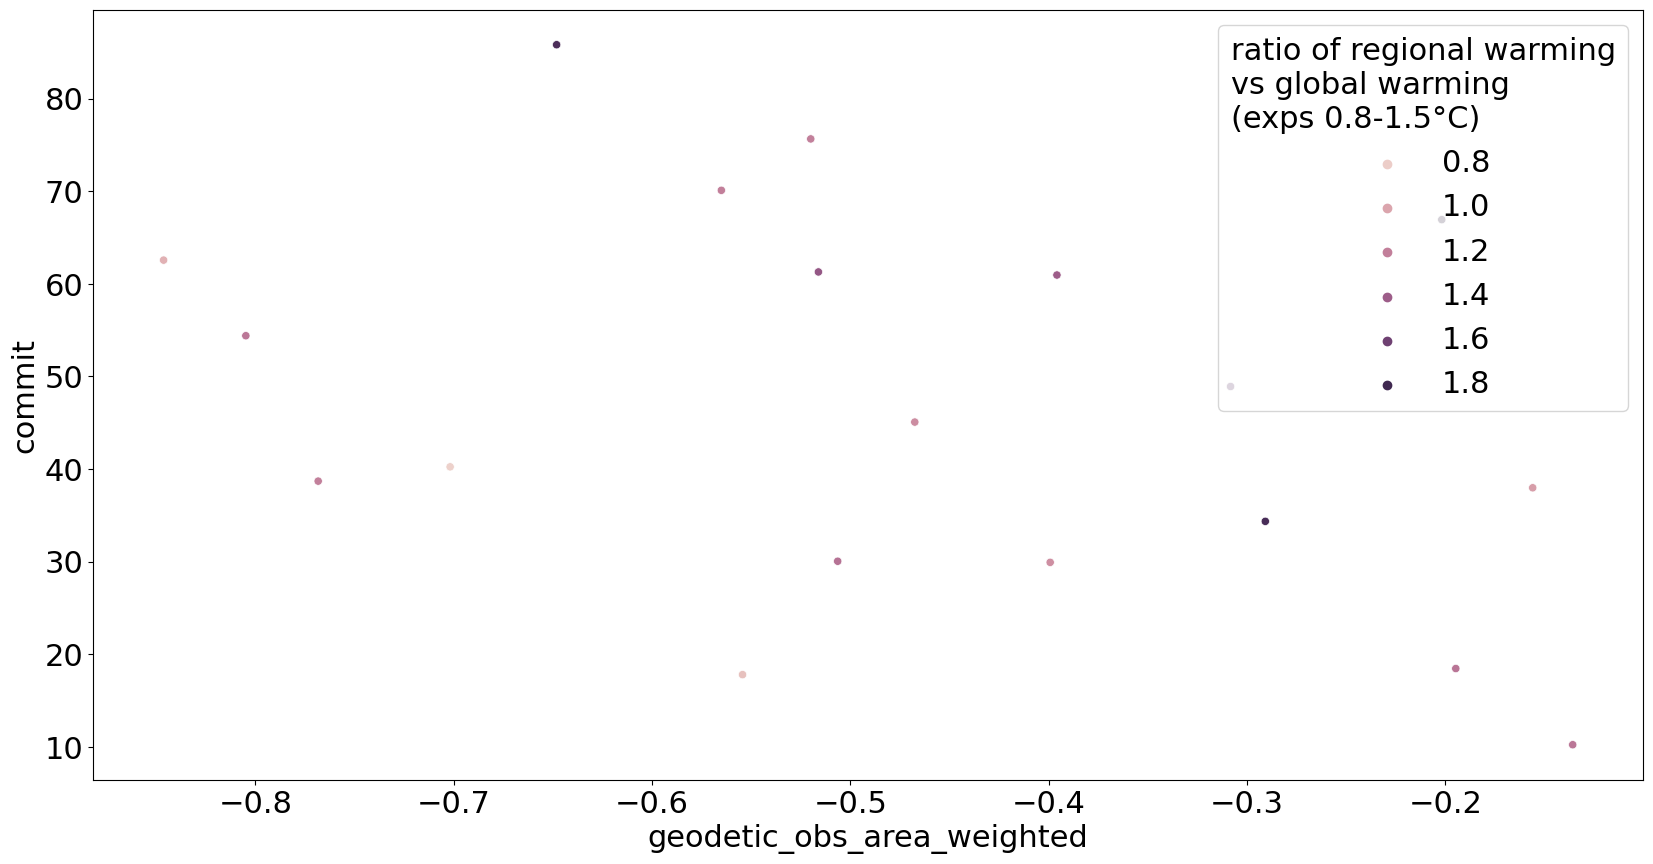

In [118]:
# actually I don't see anything here ...
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x='geodetic_obs_area_weighted', y='commit', hue='median_reg_vs_glob_temp_ch_around_one_o_2')
plt.legend(title='ratio of regional warming\nvs global warming\n(exps 0.8-1.5°C)')
# For example, more ice is committed to be lost in regions with stronger warming if temperature increases and if geodetic observations are more negative ???
# no, not really ...

In [119]:
def log(x):
    return np.log(x)
def hyperb(x):
    return 1/x
def hyperb_plus(x):
    return 1/(x+1)
def linear(x):
    return x
def quadratic(x):
    return x**2

features_bic_d_a_simple={}
features_bic_d_b_simple = {}
features_r2_d_b_simple = {}
features_r2_d_a_simple = {}
features_r2_adj_d_a_simple = {}
features_r2_adj_d_b_simple = {}
fs = fs_linear_fit
for f in fs:
    for ff in fs:
        #for fff in fs:
        features = f"{f}+{ff}" #+{fff}"
        #func=linear
        #for func in ['linear','hyperb','hyperb_plus','quadratic','log']:
        # here we only assume linearities, but actually it could also be 
        prestige_model_a = ols(f"commit ~{features}",
                                 data=df.iloc[1:]).fit()
        prestige_model_b = ols(f"sensitivity ~{features}",
                             data=df.iloc[1:]).fit()
        features_bic_d_a_simple[features] = prestige_model_a.bic
        features_bic_d_b_simple[features] = prestige_model_b.bic
        features_r2_d_a_simple[features] = prestige_model_a.rsquared
        features_r2_d_b_simple[features] = prestige_model_b.rsquared
        features_r2_adj_d_a_simple[features] = prestige_model_a.rsquared_adj
        features_r2_adj_d_b_simple[features] = prestige_model_b.rsquared_adj

pd_a = pd.DataFrame(features_bic_d_a_simple, index=['BIC']).T.sort_values(by='BIC')[::6]
pd_a['R2'] = pd.DataFrame(features_r2_d_a_simple, index=['R2']).T.loc[pd_a.index]
pd_a['R2_adj'] = pd.DataFrame(features_r2_adj_d_a_simple, index=['R2_adj']).T.loc[pd_a.index]
pd_a.iloc[:5]

BIC        R2  \
elev_diff_to_med_area_weighted+slope_weighted_v...  155.259356  0.537182   
elev_diff_to_med_area_weighted+max_elev_area_we...  157.172435  0.485284   
elev_diff_to_med_area_weighted+lat_weighted_are...  159.408589  0.417198   
mean_area_ten_largest_glac+elev_diff_to_med_are...  162.135326  0.321875   
elev_diff_to_med_area_weighted+marine_term_rati...  162.504807  0.307811   

                                                      R2_adj  
elev_diff_to_med_area_weighted+slope_weighted_v...  0.475473  
elev_diff_to_med_area_weighted+max_elev_area_we...  0.416655  
elev_diff_to_med_area_weighted+lat_weighted_are...  0.339491  
mean_area_ten_largest_glac+elev_diff_to_med_are...  0.231458  
elev_diff_to_med_area_weighted+marine_term_rati...  0.215519

In [120]:
df.mean_len_ten_largest_glac

All          NaN
01           NaN
02           NaN
03     78.380625
04     46.283600
05     46.585750
06     45.105111
07     49.894000
08     12.745857
09     47.861400
10     12.514800
11           NaN
12           NaN
13           NaN
14     69.181000
15     25.870000
16      6.022556
17           NaN
18           NaN
19           NaN
Name: mean_len_ten_largest_glac, dtype: float64

In [121]:
df.mean_len_ten_largest_glac

All          NaN
01           NaN
02           NaN
03     78.380625
04     46.283600
05     46.585750
06     45.105111
07     49.894000
08     12.745857
09     47.861400
10     12.514800
11           NaN
12           NaN
13           NaN
14     69.181000
15     25.870000
16      6.022556
17           NaN
18           NaN
19           NaN
Name: mean_len_ten_largest_glac, dtype: float64

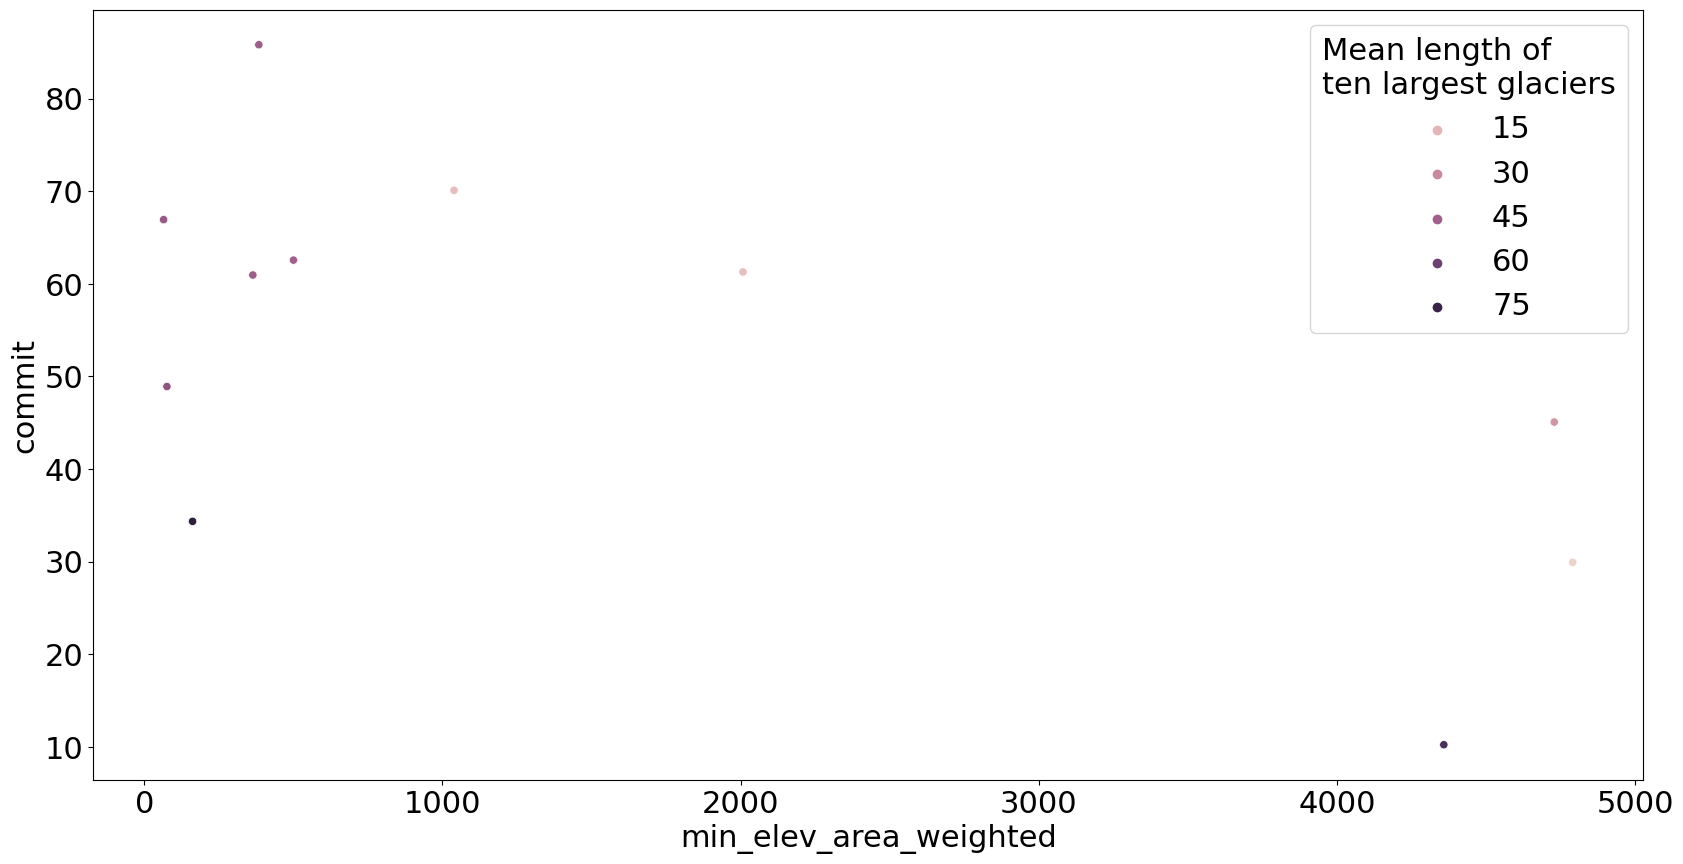

In [122]:
# amean_len_ten_largest_glacI don't see anything here ...
plt.figure(figsize=(20,10))
sns.scatterplot(data = df, x='min_elev_area_weighted', y='commit', hue='mean_len_ten_largest_glac')
plt.legend(title='Mean length of\nten largest glaciers')
# no, not really ...

*temperatuer sensitivity*

In [123]:
pd_b = pd.DataFrame(features_bic_d_b_simple, index=['BIC']).T.sort_values(by='BIC')[::6]
pd_b['R2'] = pd.DataFrame(features_r2_d_b_simple, index=['R2']).T.loc[pd_b.index]
pd_b['R2_adj'] = pd.DataFrame(features_r2_adj_d_b_simple, index=['R2_adj']).T.loc[pd_b.index]
pd_b.iloc[:5]

BIC        R2  \
slope_weighted_vol_avg+hugonnet_twenty_years_re...  122.804965  0.515187   
min_elev_area_weighted+elev_diff_to_med_area_we...  123.980023  0.302933   
elev_diff_to_med_area_weighted+slope_weighted_a...  124.808841  0.270086   
slope_weighted_area_avg+hugonnet_twenty_years_r...  125.914554  0.428979   
mean_area_ten_largest_glac+slope_weighted_vol_avg   126.485253  0.411567   

                                                      R2_adj  
slope_weighted_vol_avg+hugonnet_twenty_years_re...  0.454585  
min_elev_area_weighted+elev_diff_to_med_area_we...  0.209991  
elev_diff_to_med_area_weighted+slope_weighted_a...  0.172765  
slope_weighted_area_avg+hugonnet_twenty_years_r...  0.357601  
mean_area_ten_largest_glac+slope_weighted_vol_avg   0.338013

In [124]:
best_features_b = pd.DataFrame(features_bic_d_b_simple, index=['BIC']).T.idxmin().values[0]
prestige_model_b = ols(f"sensitivity ~ {best_features_b}",
                                 data=df.iloc[1:]).fit()
prestige_model_b.summary()

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sensitivity   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     8.501
Date:                Thu, 15 Feb 2024   Prob (F-statistic):            0.00305
Time:                        15:35:17   Log-Likelihood:                -56.986
No. Observations:                  19   AIC:                             120.0
Df Residuals:                      16   BIC:                             122.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                9.8535      2.969      3.319      0.004       3.559      16.148
slope_weighted_vol_avg                                   1.1495      0.280      4.108      0.001       0.556       1.743
hugonnet_twenty_years_regional_dvol_dt_rel_farinotti    -0.5145      0.194     -2.656      0.017      -0.925      -0.104
==============================================================================
Omnibus:                        1.831   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.400   Jarque-Bera (JB):                1.305
Skew:                          -0.420   Prob(JB):                        0.521
Kurtosis:                       2.029   Cond. No.                         50.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Time to reach 50/80% analysis**

In [125]:
fs = fs_linear_fit_rt
features_bic_d_1_5_simple = {}
features_bic_d_3_0_simple = {}
for f in fs:
    for ff in fs:
        for fff in fs:
            
            features = f"{f}+{ff}+{fff}"
            prestige_model_1_5 = ols(f"resp_time_one_o_five_deg ~ {features}",
                                 data=df.iloc[1:]).fit()
            prestige_model_3 = ols(f"resp_time_three_deg ~ {features}",
                                 data=df.iloc[1:]).fit()
            features_bic_d_1_5_simple[features] = prestige_model_1_5.bic
            features_bic_d_3_0_simple[features] = prestige_model_3.bic
            
best_features_1_5 = pd.DataFrame(features_bic_d_1_5_simple, index=['BIC']).T.idxmin().values[0]
print(best_features_1_5)
prestige_model_1_5 = ols(f"resp_time_one_o_five_deg ~ {best_features_1_5}",
                                 data=df.iloc[1:]).fit()
print(prestige_model_1_5.summary())

geodetic_obs_area_weighted+elev_diff_to_med_area_weighted+mean_area_ten_largest_glac
                               OLS Regression Results                               
Dep. Variable:     resp_time_one_o_five_deg   R-squared:                       0.935
Model:                                  OLS   Adj. R-squared:                  0.921
Method:                       Least Squares   F-statistic:                     66.87
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):           1.53e-08
Time:                              15:37:28   Log-Likelihood:                -76.365
No. Observations:                        18   AIC:                             160.7
Df Residuals:                            14   BIC:                             164.3
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t  

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [126]:
pd_rt_15 = pd.DataFrame(features_bic_d_1_5_simple, index=['BIC']).T.sort_values(by='BIC')[::6]
pd_rt_15.iloc[:5]

BIC
mean_area_ten_largest_glac+elev_diff_to_med_are...  164.292459
elev_diff_to_med_area_weighted+mean_vol_ten_lar...  164.933566
ice_cap_ratio_hundredlargest_glac+mean_area_ten...  165.579512
elev_diff_to_med_area_weighted+mean_area_ten_la...  165.591366
mean_area_ten_largest_glac+elev_diff_to_med_are...  166.107840

                               OLS Regression Results                               
Dep. Variable:     resp_time_one_o_five_deg   R-squared:                       0.675
Model:                                  OLS   Adj. R-squared:                  0.656
Method:                       Least Squares   F-statistic:                     35.32
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):           1.61e-05
Time:                              15:37:28   Log-Likelihood:                -99.830
No. Observations:                        19   AIC:                             203.7
Df Residuals:                            17   BIC:                             205.5
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'resp_time_1_5_deg-50%')

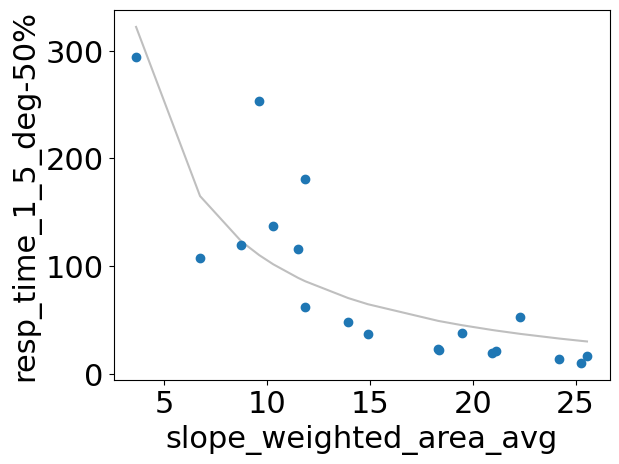

In [127]:
# best single variable ... 
prestige_model_1_5x = ols(f"resp_time_one_o_five_deg ~ hyperb(slope_weighted_area_avg)",
                            data=df.iloc[1:]).fit()
print(prestige_model_1_5x.summary())

fit_sorted = prestige_model_1_5x.fittedvalues.sort_values()
plt.plot(df.loc[fit_sorted.index].slope_weighted_area_avg, fit_sorted.values, color='grey', alpha = 0.5)
plt.plot(df.slope_weighted_area_avg, df.resp_time_one_o_five_deg, 'o')
plt.xlabel('slope_weighted_area_avg')
plt.ylabel('resp_time_1_5_deg-50%')

                                 OLS Regression Results                                
Dep. Variable:     resp_time_one_o_five_deg_80   R-squared:                       0.739
Model:                                     OLS   Adj. R-squared:                  0.723
Method:                          Least Squares   F-statistic:                     48.08
Date:                         Thu, 15 Feb 2024   Prob (F-statistic):           2.41e-06
Time:                                 15:37:28   Log-Likelihood:                -116.56
No. Observations:                           19   AIC:                             237.1
Df Residuals:                               17   BIC:                             239.0
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'resp_time_1_5_deg-80%')

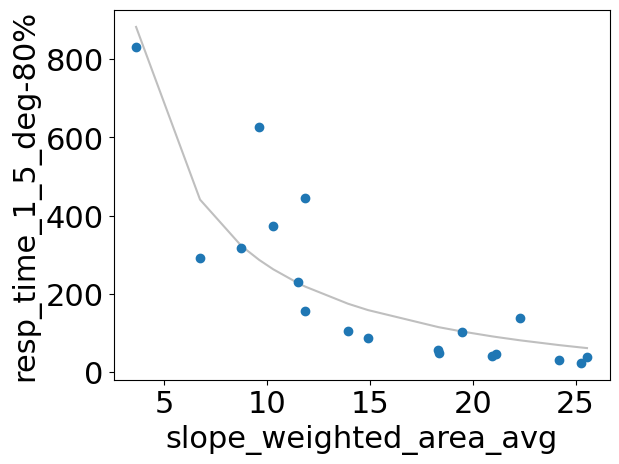

In [128]:
# best single variable ... 
prestige_model_1_5x = ols(f"resp_time_one_o_five_deg_80 ~ hyperb(slope_weighted_area_avg)",
                            data=df.iloc[1:]).fit()
print(prestige_model_1_5x.summary())

fit_sorted = prestige_model_1_5x.fittedvalues.sort_values()
plt.plot(df.loc[fit_sorted.index].slope_weighted_area_avg, fit_sorted.values, color='grey', alpha = 0.5)
plt.plot(df.slope_weighted_area_avg, df.resp_time_one_o_five_deg_80, 'o')
plt.xlabel('slope_weighted_area_avg')
plt.ylabel('resp_time_1_5_deg-80%')

In [129]:
best_features_3_0 = pd.DataFrame(features_bic_d_3_0_simple, index=['BIC']).T.idxmin().values[0]
print(best_features_3_0)
prestige_model_3_0 = ols(f"resp_time_three_deg ~ {best_features_3_0}",
                                 data=df.iloc[1:]).fit()
print(prestige_model_3_0.summary())

elev_diff_to_med_area_weighted+elev_diff_area_weighted+mean_area_ten_largest_glac
                             OLS Regression Results                            
Dep. Variable:     resp_time_three_deg   R-squared:                       0.922
Model:                             OLS   Adj. R-squared:                  0.905
Method:                  Least Squares   F-statistic:                     55.11
Date:                 Thu, 15 Feb 2024   Prob (F-statistic):           5.36e-08
Time:                         15:37:28   Log-Likelihood:                -65.511
No. Observations:                   18   AIC:                             139.0
Df Residuals:                       14   BIC:                             142.6
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                             OLS Regression Results                            
Dep. Variable:     resp_time_three_deg   R-squared:                       0.762
Model:                             OLS   Adj. R-squared:                  0.748
Method:                  Least Squares   F-statistic:                     54.57
Date:                 Thu, 15 Feb 2024   Prob (F-statistic):           1.06e-06
Time:                         15:37:28   Log-Likelihood:                -88.050
No. Observations:                   19   AIC:                             180.1
Df Residuals:                       17   BIC:                             182.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------


/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'resp_time_three_deg-50%')

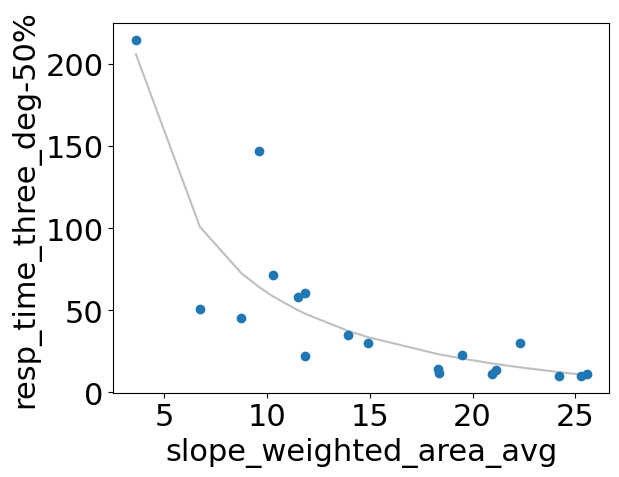

In [130]:
# best single variable ... 
prestige_model_3degx = ols(f"resp_time_three_deg ~ hyperb(slope_weighted_area_avg)",
                                 data=df.iloc[1:]).fit()
print(prestige_model_3degx.summary())

fit_sorted = prestige_model_3degx.fittedvalues.sort_values()
plt.plot(df.loc[fit_sorted.index].slope_weighted_area_avg, fit_sorted.values, color='grey', alpha = 0.5)
plt.plot(df.slope_weighted_area_avg, df.resp_time_three_deg, 'o')
plt.xlabel('slope_weighted_area_avg')
plt.ylabel('resp_time_three_deg-50%')

                              OLS Regression Results                              
Dep. Variable:     resp_time_three_deg_80   R-squared:                       0.786
Model:                                OLS   Adj. R-squared:                  0.773
Method:                     Least Squares   F-statistic:                     62.36
Date:                    Thu, 15 Feb 2024   Prob (F-statistic):           4.35e-07
Time:                            15:37:28   Log-Likelihood:                -105.49
No. Observations:                      19   AIC:                             215.0
Df Residuals:                          17   BIC:                             216.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/home/users/lschuster/.local/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'resp_time_three_deg-80%')

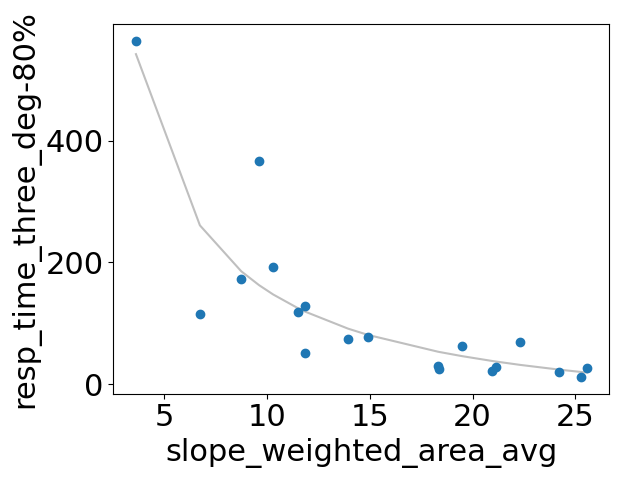

In [131]:
# best single variable ... 
prestige_model_3degx = ols(f"resp_time_three_deg_80 ~ hyperb(slope_weighted_area_avg)",
                                 data=df.iloc[1:]).fit()
print(prestige_model_3degx.summary())

fit_sorted = prestige_model_3degx.fittedvalues.sort_values()
plt.plot(df.loc[fit_sorted.index].slope_weighted_area_avg, fit_sorted.values, color='grey', alpha = 0.5)
plt.plot(df.slope_weighted_area_avg, df.resp_time_three_deg_80, 'o')
plt.xlabel('slope_weighted_area_avg')
plt.ylabel('resp_time_three_deg-80%')